# 자연어 처리 (Natural Language Processing)
- 자연어 : 우리가 일상 생활에서 사용하는 언어
- 자연어 처리 : 자연어의 의미를 분석하여 컴퓨터가 처리할 수 있도록 하는 것
    - ex) 음성 인식, 내용 요약, 번역, 사용자의 감성 분석, 텍스트 분류 작업(스팸 메일 분류, 뉴스 기사 카테고리 분류), 질의 응답 시스템, 챗봇

## 필요 프레임워크와 라이브러리
- numpy, pandas, scikit-learn, matplotlib, seaborn, nltk
- tensorflow, keras, gensim
- 자연어 처리 : nltk, konlpy

In [ ]:
# pip install tensorflow
# pip install keras
# pip install gensim # 토픽 모델링, 자연어 처리 (Word2Vec)
! pip list

## 판다스 프로파일링

- EDA (Exploratory Data Analysis) 탐색적 데이터 분석
    - 데이터 내 값의 분포
    - 변수 간의 관계
    - Null 결측값 확인

In [13]:
# pip install pandas-profiling

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import pandas_profiling

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target

df.head()
df.shape # (150,4)

(150, 5)

In [3]:
pr = df.profile_report()

In [4]:
pr
## Overview : 데이터의 전체적 개요
# Number of variables : 5열
# Number of observations : 150행
# missing cells : 결측값 0개

## 변수 Variables
# 결측값, 중복을 제외한 unique값의 개수 등의 통계치
# 상위 5개 값 시각화

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 머신러닝 워크플로우

1. 수집 (Acquisition)
- 기계에 학습시킬 자연어 (텍스트) 데이터 '말뭉치 또는 코퍼스(corpus)' 
2. 점검 및 탐색 (Inspection and exploration)
- 탐색적 데이터 분석 단계 (EDA : Exploratory Data Analysis)
- 독립변수, 종속변수, 변수 유형, 변수의 데이터 타입 점검
- 간단한 시각화와 통계 테스트를 진행하여 데이터의 특징과 구조적 관계 파악
3. 전처리 및 정제 (Preprocessing and Cleaning)
- 토큰화, 정제, 정규화, 불용어 제거
4. 모델링 및 훈련 (Modeling and Training)
- 모델링
- 학습용 데이터를 이용한 기계 학습
- 검증용 데이터를 이용한 성능 측정 및 개선 (모의고사)
5. 평가 (Evaluation)
- 평가용 데이터를 이용한 최종 성능 수치화 및 평가 (수능 및 채점)
6. 배포 (Deployment)

# 텍스트 전처리 (Text preprocessing)

## 토큰화 (Tokenization)

### 단어 토큰화 (Word Tokenization)
- 토큰의 기준이 단어인 경우
1. word_tokenize : 공백과 구두점을 기준으로 토큰화
2. WordPunctTokenizer : 공백과 구두점을 기준으로 토큰화 + 구두점을 별도로 분류
3. text_to_word_sequence : 아포스트로피'를 제외한 구두점 제거 & 소문자 변환
4. TreebankWordTokenizer : 하이픈-은 하나로 유지 + 아포스트로피'는 분리

In [5]:
# 1. word_tokenize
from nltk.tokenize import word_tokenize

print('단어 토큰화1 :',word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [6]:
# 2. WordPunctTokenizer : 구두점을 별도로 분류
from nltk.tokenize import WordPunctTokenizer

print('단어 토큰화2 :',WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화2 : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [7]:
# 3. text_to_word_sequence : 아포스트로피'를 제외한 구두점 제거 & 소문자 변환
from tensorflow.keras.preprocessing.text import text_to_word_sequence

print('단어 토큰화3 :',text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


In [8]:
# 4. TreebankWordTokenizer : 하이픈-으로 구성된 단어는 하나로 유지 & 아포스트로피'로 구성된 접어(clitic)는 분리

from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal, it doesn't have a food chain or restaurant of their own."
print('트리뱅크 워드토크나이저 :',tokenizer.tokenize(text))

트리뱅크 워드토크나이저 : ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal', ',', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


In [9]:
# 5. RegexpTokenizer : 정규표현식 토큰화
from nltk.tokenize import RegexpTokenizer

text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

tokenizer1 = RegexpTokenizer("[\w]+")
# 알파벳, 숫자가 1회 이상 반복
tokenizer2 = RegexpTokenizer("\s+", gaps=True)
# 공백이 1회 이상 반복
# gaps=True : 해당 정규식을 토큰으로 나누기 위한 기준으로 사용한다는 의미
# gaps=False (DEFAULT) : 토큰화의 결과는 공백들만

print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))
# 아포스트로피나 온점을 제외하지 않고 토큰화가 수행됨

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


### 문장 토큰화 (Sentence Tokenization)
- 토큰의 단위가 단어가 아닌 '문장'일 경우
- = 문장 분류 (Sentence Segmentation)
- 마침표.는 문장의 끝이 아니더라도 등장할 수 있음 ex) ph.D, gmail.com
1. sent_tokenize
2. kss (한국어)

In [10]:
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print('문장 토큰화1 :',sent_tokenize(text))

문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [11]:
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print('문장 토큰화2 :',sent_tokenize(text))

문장 토큰화2 : ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


### 한국어 토큰화
1. 영어 : 합성어와 줄임말에 대한 예외 처리만 한다면, 띄어쓰기를 기준으로 "어절 토큰화" 수행 가능
2. 한국어 : 조사, 어미 등이 붙어 있는 교착어이므로 형태소(morpheme)를 기준으로 "형태소 토큰화" 수행 가능
    - 자립 형태소 : 자체로 단어가 되는 자립적 형태소
        - 체언 (명사, 대명사, 수사)
        - 수식언 (관형사, 부사)
        - 감탄사
    - 의존 형태소 : 다른 형태소와 결합하여 사용되는 의존적 형태소
        - 접사
        - 조사
        - 어간
        - 어미

In [12]:
# pip install kss

In [13]:
import kss
# Korean Sentence Splitter

text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'
print('한국어 문장 토큰화 :',kss.split_sentences(text))

[Kss]: Because there's no supported C++ morpheme analyzer, Kss will take pecab as a backend. :D
For your information, Kss also supports mecab backend.
We recommend you to install mecab or konlpy.tag.Mecab for faster execution of Kss.
Please refer to following web sites for details:
- mecab: https://cleancode-ws.tistory.com/97
- konlpy.tag.Mecab: https://uwgdqo.tistory.com/363



한국어 문장 토큰화 : ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


### 품사 태깅 (Part-of-speech-tagging)
- 품사에 따라 단어의 의미가 달라지는 경우 : 품사 태깅을 통해 구분

In [14]:
import nltk
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)

print('단어 토큰화 :',tokenized_sentence)
print('품사 태깅 :', pos_tag(tokenized_sentence))

단어 토큰화 : ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅 : [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


1. Okt (Open Korea Text)
2. 메캅(Mecab)
3. 코모란(Komoran)
4. 한나눔(Hannanum)
5. 꼬꼬마(Kkma)
- morphs : 형태소 추출
- pos : 품사 태깅
- nouns : 명사 추출

In [15]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

print('꼬꼬마 형태소 분석 :',kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 품사 태깅 :',kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 명사 추출 :',kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']
꼬꼬마 형태소 분석 : ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출 : ['코딩', '당신', '연휴', '여행']


## 정제 (Cleaning)
- 갖고 있는 코퍼스로부터 노이즈 데이터 제거
- 토큰화 전후로 수행
- 완벽한 정제 작업은 어려우므로 어느 정도 수준까지만 진행
- 노이즈 데이터 (noise data)
    - 1. 아무 의미 없는 글자 (특수 문자 등)
    - 2. 분석 목적에 부합하지 않는 불필요한 단어
        - 등장 빈도가 적은 단어
        - 길이가 짧은 단어 (영어)

### 불용어를 이용한 노이즈 데이터 제거
- 불용어 (Stopword) : 분석에 불필요한 단어들
- 1. NLTK에서 미리 정의해둔 100여개 이상의 영어 단어 패키지 사용
- 2. 사용자가 직접 정의

In [16]:
# 불용어 확인하기
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt

stop_words_list = stopwords.words('english')
# NLTK가 정의한 영어 불용어 리스트 리턴 (100개 이상)

print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [17]:
# 불용어 제거하기

example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(example)

result = []
for word in word_tokens: 
    if word not in stop_words: 
        result.append(word) 

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)
# is, not, an 제거

불용어 제거 전 : ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 : ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


한국어 불용어 제거
- 1. 토큰화 후 조사, 접속사 제거
- 2. 명사, 형용사가 포함된 불용어 사전 직접 만들기
- 참고 링크 (한국어 불용어 리스트) : https://www.ranks.nl/stopwords/korean

In [18]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


### 정규 표현식을 이용한 노이즈 데이터 제거

In [19]:
# 정규 표현식 (Regular Expression)
import re
text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
# \W : 알파벳, 숫자가 아닌 것이 0~무한번 반복
# \b : 공백
# \w{1,2} : 알파벳, 숫자가 1회 이상, 2회 이하 반복
# \b : 공백
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))
# sub : 문자열 바꾸기 : (바꿀문자열, 대상문자열, 바꿀횟수)

 was wondering anyone out there could enlighten this car.


### 정규 표현식 문법
- 특수문자
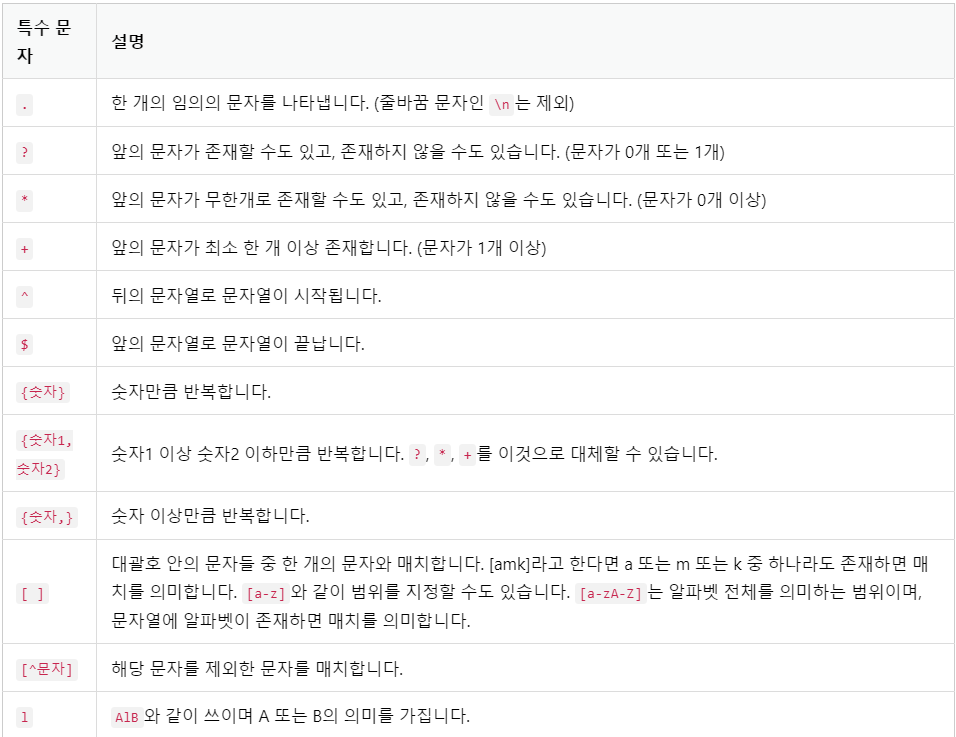

- 역 슬래시 (\)
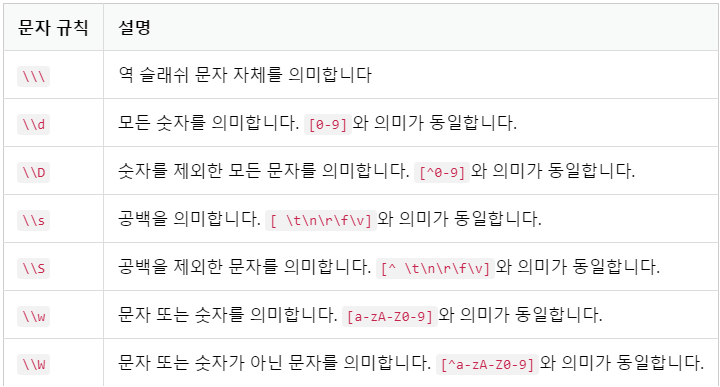

In [20]:
# 1) . : 줄바꿈 문자 \n을 제외한 모든 임의의 문자 1개
r = re.compile("a.c")
r.search("kkk")
# 아무런 결과도 출력되지 않음
r.search("abc")
# <re.Match object; span=(0, 3), match='abc'>

<re.Match object; span=(0, 3), match='abc'>

In [21]:
# 2) ? : 바로 앞의 문자가 0~1번 반복 
r = re.compile("ab?c")
r.search("abbc")
# 아무런 결과도 출력되지 않음
r.search("abc")
# <re.Match object; span=(0, 3), match='abc'>
r.search("ac")
# <re.Match object; span=(0, 2), match='ac'>

<re.Match object; span=(0, 2), match='ac'>

In [22]:
# 3) * : 바로 앞의 문자가 0~무한번 반복 
r = re.compile("ab*c")
r.search("a")
# 아무런 결과도 출력되지 않음
r.search("ac")
# <re.Match object; span=(0, 2), match='ac'>
r.search("abc")
# <re.Match object; span=(0, 3), match='abc'>
r.search("abbbbc")
# <re.Match object; span=(0, 6), match='abbbbc'>

<re.Match object; span=(0, 6), match='abbbbc'>

In [23]:
# 4) + : 바로 앞의 문자가 1~무한번 반복 
r = re.compile("ab+c")
r.search("ac")
# 아무런 결과도 출력되지 않음
r.search("abc") 
# <re.Match object; span=(0, 3), match='abc'>
r.search("abbbbc") 
# <re.Match object; span=(0, 6), match='abbbbc'>

<re.Match object; span=(0, 6), match='abbbbc'>

In [24]:
# 5) ^ : 바로 뒤의 문자로 시작되면 그것만 매치
r = re.compile("^ab")
r.search("bbc")
# 아무런 결과도 출력되지 않음
r.search("zab")
# 아무런 결과도 출력되지 않음
r.search("abz")
# <re.Match object; span=(0, 2), match='ab'>

<re.Match object; span=(0, 2), match='ab'>

In [25]:
# 6) {숫자} : 바로 앞의 문자가 m회 반복되면 매치
r = re.compile("ab{2}c")
r.search("ac")
# 아무런 결과도 출력되지 않음
r.search("abc")
# 아무런 결과도 출력되지 않음
r.search("abbbbbc")
# 아무런 결과도 출력되지 않음
r.search("abbc")
# <re.Match object; span=(0, 4), match='abbc'>

<re.Match object; span=(0, 4), match='abbc'>

In [26]:
# 7) {숫자1, 숫자2} : 바로 앞의 문자가 m회 이상, n회 이하 반복되면 매치
r = re.compile("ab{2,8}c")
r.search("ac")
# 아무런 결과도 출력되지 않음
r.search("abc")
# 아무런 결과도 출력되지 않음
r.search("abbbbbbbbc")
# 아무런 결과도 출력되지 않음
r.search("abbc")
# <re.Match object; span=(0, 4), match='abbc'>
r.search("abbbbbbbbc")
# <re.Match object; span=(0, 10), match='abbbbbbbbc'>

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

In [27]:
# 8) {숫자,} : 바로 앞의 문자가 m회 이상 반복되면 매치 ({0,} == * / {1,} == +)
r = re.compile("ab{2,8}c")
r.search("ac")
# 아무런 결과도 출력되지 않음
r.search("abc")
# 아무런 결과도 출력되지 않음
r.search("abbbbbbbbc")
# 아무런 결과도 출력되지 않음
r.search("abbc")
# <re.Match object; span=(0, 4), match='abbc'>
r.search("abbbbbbbbc")
# <re.Match object; span=(0, 10), match='abbbbbbbbc'>

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

In [28]:
# 9) [] : 괄호 안의 문자 중 하나라도 포함하면 매치
r = re.compile("[abc]")
# r = re.compile("[a-c]")
r.search("zzz")
# 아무런 결과도 출력되지 않음
r.search("a")
# <re.Match object; span=(0, 1), match='a'>
r.search("aaaaaaa")
# <re.Match object; span=(0, 1), match='a'>
r.search("baac")
# <re.Match object; span=(0, 1), match='b'>


r = re.compile("[a-z]")
r.search("AAA")
# 아무런 결과도 출력되지 않음
r.search("111") 
# 아무런 결과도 출력되지 않음
r.search("aBC")
# <re.Match object; span=(0, 1), match='a'>

<re.Match object; span=(0, 1), match='a'>

In [29]:
# 10) [^] : 괄호 안의 문자를 제외한 것 중 하나라도 포함하면 매치
r = re.compile("[^abc]")
# r = re.compile("[^a-c]")
r.search("a")
# 아무런 결과도 출력되지 않음
r.search("ab") 
# 아무런 결과도 출력되지 않음
r.search("b")
# 아무런 결과도 출력되지 않음
r.search("d")
# <re.Match object; span=(0, 1), match='d'>
r.search("1")
# <re.Match object; span=(0, 1), match='1'>

<re.Match object; span=(0, 1), match='1'>

### 정규 표현식 모듈 함수
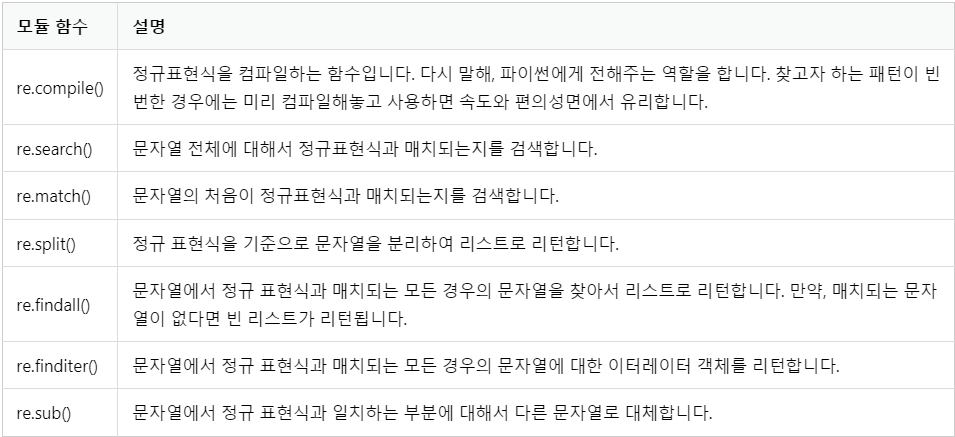

In [30]:
# 1) re.match() : 문자열의 처음부터 검색 + 매치하지 않을 때까지
# 와 re.search() : 문자열의 전체를 검색 + 처음으로 매치된 것만 반환 + 매치되지 않으면 출력X
r = re.compile("ab.")
r.match("kkkabc")
# 아무런 결과도 출력되지 않는다.
r.search("kkkabc")
# <re.Match object; span=(3, 6), match='abc'>
r.match("abckkk")
# <re.Match object; span=(0, 3), match='abc'>

<re.Match object; span=(0, 3), match='abc'>

In [31]:
# 2) re.split() : 입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 리턴

text = "사과 딸기 수박 메론 바나나"
re.split(" ", text) # 공백 기준 분리
# ['사과', '딸기', '수박', '메론', '바나나']


text = """사과
딸기
수박
메론
바나나"""
re.split("\n", text) # 줄바꿈 기준 분리
# ['사과', '딸기', '수박', '메론', '바나나']


text = "사과+딸기+수박+메론+바나나"
re.split("\+", text) # '+' 기준 분리
# ['사과', '딸기', '수박', '메론', '바나나']

['사과', '딸기', '수박', '메론', '바나나']

In [32]:
# 3) re.findall() : 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴 (단, 매치되는 문자열이 없다면 빈 리스트 리턴)

text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""
re.findall("\d+", text)
# ['010', '1234', '1234', '30']

re.findall("\d+", "문자열입니다.")
# [] : 빈 리스트 리턴

[]

In [33]:
# 4) re.sub() : 정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체 (용도 : 특수 문자 제거 또는 알파벳 이외의 문자 공백으로 처리)

text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub('[^a-zA-Z]', ' ', text)
print(preprocessed_text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


### 정규 표현식 예제

In [34]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

re.split('\s+', text)  
# \s : 공백
# + : 바로 앞의 단어가 1회 이상 반복
# ['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

re.findall('\d+',text) 
# \d : 숫자
# ['100', '101', '102']

re.findall('[A-Z]',text)
# [A-Z] : 대문자
# ['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

re.findall('[A-Z]{4}',text)
# [A-Z]{4} : 대문자가 4회 이상 반복
# ['PROF', 'STUD', 'STUD']

re.findall('[A-Z][a-z]+',text)
# [A-Z][a-z]+ : 처음에 대문자가 등장한 후, 소문자가 1회 이상 반복
# ['John', 'James', 'Mac']

['John', 'James', 'Mac']

## 정규화 (Normalization)
- 표현 방법이 다른 단어들을 통합하여 같은 단어로 만들기

<표기가 다른 단어 통합>
- 목적 : 표현 방법은 다르나 의미가 같은 단어들을 하나의 단어로 일반화시켜 문서 내의 단어 수, 즉 코퍼스의 복잡성을 줄이기
- ex) am,are,is -> be :표제어(Lemma, 기본 사전형 단어)
- ex) cats -> 어간cat, 접사-s

1. 어간 추출 (stemming)
    - 1. 단어의 형태학적 분석을 단순화한 버전
    - 2. 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업
        - 어간 (stem) : 단어의 의미를 담고 있는 핵심 부분
        - 접사 (affix) : 단어에 추가적인 의미를 주는 부분
        - 섬세한 작업이 아니므로 어간 추출의 결과 단어는 사전에 존재하지 않는 단어일 수 있음
    - 표제어 추출보다 일반적으로 빠름
    - 1. 포터 어간 추출기 (Porter Stemmer) : 정밀하게 설계되어 정확도가 높으므로 영어 자연어 처리에서 어간 추출시 유용한 선택
    - 2. 랭커스터 스태머(Lancaster Stemmer)
    
2. 표제어 추출 (lemmatization)
    - 표제어(Lemma, 기본 사전형 단어)


3. 대소문자 통합
     - 문장 맨 앞 단어의 대문자만 소문자로 바꾸고, 다른 단어들은 전부 대문자인 상태로 놔두는 규칙
     - 예외) US와 us / 회사이름 /사람이름

### 표제어 추출 (lemmatization)
- 어간 (stem) : 단어의 의미를 담고 있는 핵심 부분
- 접사 (affix) : 단어에 추가적인 의미를 주는 부분
     - ex) am,are,is -> be :표제어(Lemma, 기본 사전형 단어)
     - ex) cats -> 어간cat, 접사-s

In [35]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting', 'this', 'was', 'not', "Anne's", 'pen', 'but', 'flying', 'dusts', '.']

print('표제어 추출 전 :',words)
print('표제어 추출 후 :',[lemmatizer.lemmatize(word) for word in words])
# dy, ha : 표제어추출기(lemmatizer)가 본래 단어의 품사 정보를 모르기 때문

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


표제어 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting', 'this', 'was', 'not', "Anne's", 'pen', 'but', 'flying', 'dusts', '.']
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting', 'this', 'wa', 'not', "Anne's", 'pen', 'but', 'flying', 'dust', '.']


In [ ]:
# 각 단어의 품사를 입력해서 알려주면, 표제어 추출기는 품사의 정보를 보존하면서 정확한 Lemma를 출력해줌

In [23]:
lemmatizer.lemmatize('dies', 'v')

'die'

In [24]:
lemmatizer.lemmatize('watched', 'v')

'watch'

In [25]:
lemmatizer.lemmatize('has', 'v')

'have'

### 어간 추출 (stemming)
- 1. 단어의 형태학적 분석을 단순화한 버전
- 2. 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업
    - 섬세한 작업이 아니므로 어간 추출의 결과 단어는 사전에 존재하지 않는 단어일 수 있음
    - 표제어 추출보다 일반적으로 빠름
- 1. 포터 어간 추출기 (Porter Stemmer) : 정밀하게 설계되어 정확도가 높으므로 영어 자연어 처리에서 어간 추출시 유용한 선택
- 2. 랭커스터 스태머(Lancaster Stemmer)

In [26]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()
# 포터 알고리즘 (Porter Algorithm) :
# ALIZE → AL
# ANCE → 제거
# ICAL → IC

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
tokenized_sentence = word_tokenize(sentence)

print('어간 추출 전 :', tokenized_sentence)
print('어간 추출 후 :',[stemmer.stem(word) for word in tokenized_sentence])

어간 추출 전 : ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후 : ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


In [27]:
words = ['formalize', 'allowance', 'electricical']

print('어간 추출 전 :',words)
print('어간 추출 후 :',[stemmer.stem(word) for word in words])

어간 추출 전 : ['formalize', 'allowance', 'electricical']
어간 추출 후 : ['formal', 'allow', 'electric']


In [2]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'flying', 'dies', 'watched', 'has', 'starting', 'this', 'was', 'not', "Anne's", 'pen', 'but', 'flying', 'dusts', '.']
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:',[porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:',[lancaster_stemmer.stem(w) for w in words])

# 포터 스태머 : organization -> organ : 의미가 완전히 다른 단어임에도 같은 어간이라는 결과가 나왔음

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'flying', 'dies', 'watched', 'has', 'starting', 'this', 'was', 'not', "Anne's", 'pen', 'but', 'flying', 'dusts', '.']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start', 'thi', 'wa', 'not', "anne'", 'pen', 'but', 'fli', 'dust', '.']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start', 'thi', 'was', 'not', "anne's", 'pen', 'but', 'fly', 'dust', '.']


<한국어 어간 추출>
- 한국어 : 5언 9품
1. 체언 (명사, 대명사, 수사)
2. 수식언 (관형사, 부사)
3. 관계언 (조사)
4. 독립언 (감탄사)
5. 용언 (동사, 형용사) : 어간(stem)과 어미(ending)의 결합

<활용 conjugation>
- 어간(stem)이 어미(ending)를 취하는 것
- 1. 규칙 활용 : 어간이 변하지 않는 경우 ex) 잡다
- 2. 불규칙 활용 : 어간이나 어미가 변하는 경우

### 대소문자 통합
- 문장 맨 앞 단어의 대문자만 소문자로 바꾸고, 다른 단어들은 전부 대문자인 상태로 놔두는 규칙
- 예외)
- US와 us
- 회사이름
- 사람이름

## 정수 인코딩 (Integer Encoding)
- 텍스트 -> 숫자로 변환
- 각 단어를 고유한 정수(인덱스)에 맵핑(mapping)
    - 1. 랜덤으로 부여
    - 2. 단어 빈도수 기준으로 정렬하여 부여

### dictionary 사용하기

In [37]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

raw_text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

# 문장 토큰화
sentences = sent_tokenize(raw_text)
print(sentences)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


In [38]:
# 소문자화하여 단어의 개수 통일
# 불용어 제외
# 단어 길이가 2 이하인 경우 제외
vocab = {}
preprocessed_sentences = []
stop_words = set(stopwords.words('english'))

for sentence in sentences:
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []

    for word in tokenized_sentence: 
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄이기
        if word not in stop_words: # 단어 토큰화된 결과에 대해서 불용어를 제거
            if len(word) > 2: # 단어 길이가 2이하인 경우를 추가로 제거
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0 # 딕셔너리객체['키값'] = 벨류값
                vocab[word] += 1
    preprocessed_sentences.append(result) 
print(preprocessed_sentences)
print('-'*30)
print('단어 집합 :',vocab)
print('-'*30)
print(vocab["barber"]) # 'barber'라는 단어의 빈도수 출력

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]
------------------------------
단어 집합 : {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}
------------------------------
8


In [40]:
# 빈도수 내림차순 정렬
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [41]:
# 내림차순으로 인덱스 부여
# 높은 빈도수일수록 낮은 정수 부여

word_to_index = {}
i = 0
for (word, frequency) in vocab_sorted :
    if frequency > 1 :
        # 빈도수가 작은 단어는 제외
        # 등장 빈도가 낮은 단어는 자연어 처리에서 의미를 가지지 않을 가능성이 높기 때문에 빈도수가 1인 단어들은 전부 제외시킴
        i = i + 1
        word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


In [42]:
# 상위 5개 단어만 사용하기
vocab_size = 5

# 인덱스가 5 초과인 단어 제거
words_frequency = [word for word, index in word_to_index.items() if index >= vocab_size + 1]
# .items() : 키와 벨류의 쌍을 튜플로 얻어옴
# index가 5 초과인 key값만 가져온 것

# 해당 단어에 대한 인덱스 정보를 삭제
for w in words_frequency:
    del word_to_index[w]
    # 키 값 삭제 : del dict객체['key값']
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [43]:
# 단어 -> 정수로 바꾸기(인코딩)
# OOV (Out-Of-Vocabulary:단어 집합에 없는 단어) 문제 : word_to_index에 'OOV'단어 추가 & 단어 집합에 없는 단어들은 'OOV'의 인덱스로 인코딩
word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


In [44]:
# 모든 단어를 정수로 맵핑하기
encoded_sentences = []
for sentence in preprocessed_sentences:
    encoded_sentence = []
    for word in sentence:
        try:
            # 단어 집합에 있는 단어라면 해당 단어의 정수를 리턴
            encoded_sentence.append(word_to_index[word])
        except KeyError:
            # 만약 단어 집합에 없는 단어라면 'OOV'의 정수를 리턴
            encoded_sentence.append(word_to_index['OOV'])
    encoded_sentences.append(encoded_sentence)
print(encoded_sentences)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


### Counter 사용하기

In [45]:
from collections import Counter
print(preprocessed_sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [46]:
# 콤마, 제거 후 단어들을 하나의 리스트로 만들기

# words = np.hstack(preprocessed_sentences)으로도 수행 가능.
all_words_list = sum(preprocessed_sentences, [])
print(all_words_list)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


In [47]:
# Counter : 중복 제거 후 단어의 빈도수 카운트
vocab = Counter(all_words_list)
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [48]:
# vocab['key값'] : 'barber'의 빈도수
print(vocab["barber"])

8


In [49]:
# vocab.most_common(숫자) : 빈도수 상위 n개의 단어를 튜플의 형태로 반환
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [50]:
# 내림차순으로 인덱스 부여
# 높은 빈도수일수록 낮은 정수 부여

word_to_index = {}
i = 0
for (word, frequency) in vocab :
    i = i + 1
    word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


### ntlk의 FreqDist 사용하기

In [52]:
from nltk import FreqDist
import numpy as np

# np.hstack으로 문장 구분을 제거
vocab = FreqDist(np.hstack(preprocessed_sentences))
print(np.hstack(preprocessed_sentences))
print(vocab["barber"]) # 'barber'의 빈도수 출력

['barber' 'person' 'barber' 'good' 'person' 'barber' 'huge' 'person'
 'knew' 'secret' 'secret' 'kept' 'huge' 'secret' 'huge' 'secret' 'barber'
 'kept' 'word' 'barber' 'kept' 'word' 'barber' 'kept' 'secret' 'keeping'
 'keeping' 'huge' 'secret' 'driving' 'barber' 'crazy' 'barber' 'went'
 'huge' 'mountain']
8


In [91]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]


In [92]:
# enumerate()을 활용한 인덱스 부여
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


<enumerate()>
- 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아
- 인덱스를 순차적으로 함께 리턴

In [94]:
test_input = ['a', 'b', 'c', 'd', 'e']
for index, value in enumerate(test_input):
    # 입력의 순서대로 0부터 인덱스를 부여
    print("value : {}, index: {}".format(value, index))

value : a, index: 0
value : b, index: 1
value : c, index: 2
value : d, index: 3
value : e, index: 4


### keras의 Tokenizer ( num_words=숫자, oov_token = 'OOV') 사용하기
- 1. num_words : 빈도수 상위 n-1개 단어만 사용
- 2. oov_token : 기본적으로 단어 집합에 없는 단어인 OOV에 대해서는 단어를 정수로 바꾸는 과정에서 아예 단어를 제거한다는 특징이 있음 (단어 집합에 없는 단어들을 OOV로 간주하여 보존하고 싶다면 Tokenizer의 인자 oov_token을 사용)

In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer

preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

tokenizer = Tokenizer()
# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer.fit_on_texts(preprocessed_sentences)
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [56]:
# texts_to_sequences() : 입력으로 들어온 코퍼스에 대해서 각 단어를 이미 정해진 인덱스로 변환
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [57]:
# tokenizer = Tokenizer(num_words=숫자) : 빈도수 상위 n-1개 단어만 사용
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 1) # 상위 5개 단어만 사용
tokenizer.fit_on_texts(preprocessed_sentences)
print(tokenizer.word_index) # 5개 미적용

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [58]:
print(tokenizer.word_counts) # 5개 미적용

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [59]:
print(tokenizer.texts_to_sequences(preprocessed_sentences)) # 5개 적용
# 1번 단어부터 5번 단어까지만 보존되고 나머지 단어들은 제거됨

[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [60]:
# 만약 word_index와 word_counts에서도 지정된 num_words만큼의 단어만 남기고 싶다면

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)

vocab_size = 5
words_frequency = [word for word, index in tokenizer.word_index.items() if index >= vocab_size + 1] 

# 인덱스가 5 초과인 단어 제거
for word in words_frequency:
    del tokenizer.word_index[word] # 해당 단어에 대한 인덱스 정보를 삭제
    del tokenizer.word_counts[word] # 해당 단어에 대한 카운트 정보를 삭제

print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(preprocessed_sentences))

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}
OrderedDict([('barber', 8), ('person', 3), ('huge', 5), ('secret', 6), ('kept', 4)])
[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [65]:
# oov_token : 단어 집합에 없는 단어들을 OOV로 간주하여 보존하고 싶을 때 사용 ('OOV'의 인덱스는 1)
# 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2

vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV')
tokenizer.fit_on_texts(preprocessed_sentences)
tokenizer.word_index
tokenizer.word_counts
# print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

OrderedDict([('barber', 8),
             ('person', 3),
             ('good', 1),
             ('huge', 5),
             ('knew', 1),
             ('secret', 6),
             ('kept', 4),
             ('word', 2),
             ('keeping', 2),
             ('driving', 1),
             ('crazy', 1),
             ('went', 1),
             ('mountain', 1)])

In [62]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))
# 빈도수 상위 5개의 단어 : 2 ~ 6까지의 인덱스
# 단어 집합에 없는 'good'과 같은 단어들 : 전부 'OOV'의 인덱스인 1로 인코딩

[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


## 패딩 (Padding)
- 데이터에 특정 값을 채워서 데이터의 크기(shape)를 조정하는 것
    - 숫자 0 사용시 : 제로 패딩(zero padding)
- 길이가 전부 동일한 문서들에 대해 하나의 행렬로 간주하여 한꺼번에 묶어서 처리하는 '병렬 연산'을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업
    - 1. numpy : 문서의 뒤에 0 채우기
    - 2. keras : 문서의 앞에 0 채우기 (뒤로 채우고 싶으면 padding='post')

### numpy 사용하기

In [104]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [105]:
# 모두 동일한 길이로 맞춰주기 위해, 이 중에서 가장 길이가 긴 문장의 길이를 계산
max_len = max(len(item) for item in encoded)
print('최대 길이 :',max_len)

최대 길이 : 7


In [106]:
# 가상의 단어 'PAD'를 사용하여 0번 단어로 정의
# 길이가 7보다 짧은 문장에는 숫자 0을 채워서 길이 7로 맞추기

for sentence in encoded:
    while len(sentence) < max_len:
        sentence.append(0)

padded_np = np.array(encoded)
padded_np
# 모든 문장의 길이가 전부 7
# 기계는 이들을 하나의 행렬로 간주하여 병렬 처리를 수행
# 0번 단어는 사실 아무런 의미도 없는 단어이기 때문에 자연어 처리하는 과정에서 기계는 0번 단어를 무시

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

### keras의 pad_sequences 사용하기

In [107]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# encoded 값이 위에서 이미 패딩 후의 결과로 저장되었기 때문에 패딩 이전의 값으로 다시 되돌리기
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [108]:
# 문서의 앞을 0으로 채우기
padded = pad_sequences(encoded)
padded

array([[ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  8,  5],
       [ 0,  0,  0,  0,  1,  3,  5],
       [ 0,  0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  2,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  2],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 0,  0,  0,  1, 12,  3, 13]])

In [109]:
# 문서의 뒤를 0으로 채우기
padded = pad_sequences(encoded, padding='post')
padded

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

In [110]:
# numpy 패딩과 keras 패딩 비교하기
(padded == padded_np).all()

True

In [112]:
# maxlen : 문서의 길이 기준 지정하기
padded = pad_sequences(encoded, padding='post', maxlen=5)
padded

# 길이가 5보다 짧은 문서들 : 0으로 패딩
# 기존에 5보다 길었던 문서 : 앞부터 데이터 손실
#  [ 7, 7, 3, 2, 10, 1, 11] -> [ 3, 2, 10, 1, 11]

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0]])

In [113]:
# truncating='post' : 뒤부터 데이터 삭제
padded = pad_sequences(encoded, padding='post', truncating='post', maxlen=5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 7,  7,  3,  2, 10],
       [ 1, 12,  3, 13,  0]])

In [114]:
# 숫자 0이 아닌 다른 숫자로 패딩하기
last_value = len(tokenizer.word_index) + 1 # 단어 집합의 크기보다 1 큰 숫자를 사용
print(last_value)

14


In [115]:
padded = pad_sequences(encoded, padding='post', value=last_value)
padded

array([[ 1,  5, 14, 14, 14, 14, 14],
       [ 1,  8,  5, 14, 14, 14, 14],
       [ 1,  3,  5, 14, 14, 14, 14],
       [ 9,  2, 14, 14, 14, 14, 14],
       [ 2,  4,  3,  2, 14, 14, 14],
       [ 3,  2, 14, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  2, 14, 14, 14, 14],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13, 14, 14, 14]])

## 원-핫 인코딩 (One-Hot Encoding)
- 단어 집합 내에 있는 단어 : 문자 -> 벡터로 변환
- 원-핫 벡터 (One-Hot Vector) : 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식
    - 1. 정수 인코딩 수행 : 각 단어에 고유한 정수 부여
    - 2. 표현하고 싶은 단어의 고유한 정수를 인덱스로 간주하여 해당 위치에 1을 부여하고, 다른 단어의 인덱스의 위치에는 0을 부여
- 한계 :
    - 1. 단어 집합의 크기 = 벡터 차원의 개수 : 단어의 개수가 늘어날수록, 벡터를 저장하기 위해 필요한 공간, 즉 벡터의 차원이 계속 늘어난다는 단점
    - 2. 단어의 유사도 표현 불가
        - 대안 : 단어의 잠재 의미를 반영하여 다차원 공간에 벡터화
            - 2-1. 카운트 기반의 벡터화 방법 : LSA(잠재 의미 분석), HAL 등
            - 2-2. 예측 기반의 벡터화 방법 : NNLM, RNNLM, Word2Vec, FastText 등
            - 2-3. 카운트 & 예측 기반 모두 사용한 벡터화 방법 : GloVe

### 사용자 정의 함수 사용하기

In [116]:
from konlpy.tag import Okt  

okt = Okt()  
tokens = okt.morphs("나는 자연어 처리를 배운다")  
print(tokens)

['나', '는', '자연어', '처리', '를', '배운다']


In [117]:
word_to_index = {word : index for index, word in enumerate(tokens)}
print('단어 집합 :',word_to_index)

단어 집합 : {'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [118]:
def one_hot_encoding(word, word_to_index):
    one_hot_vector = [0]*(len(word_to_index))
    index = word_to_index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

one_hot_encoding("자연어", word_to_index)
# '자연어'는 정수 2 : 인덱스 2의 값이 1이며, 나머지 값은 0인 벡터 출력

[0, 0, 1, 0, 0, 0]

### keras의 to_categorical 사용하기

In [68]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
print('단어 집합 :',tokenizer.word_index)

단어 집합 : {'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}


In [69]:
# texts_to_sequences : 정수 시퀀스로 변환
sub_text = "점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded = tokenizer.texts_to_sequences([sub_text])
print(encoded)

[[2, 5, 1, 6, 3, 7]]


In [121]:
# 원-핫 인코딩 수행
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


## 데이터의 분리 (Splitting Data)

<지도 학습 (Supervised Learning)>
- 정답 y가 있음
- 훈련용 데이터로 학습
- 평가용 데이터로 정확도 평가

### zip 함수 사용하기
- zip() : 동일한 개수를 가진 시퀀스 자료형에 대해, 각 순서에 등장하는 원소들끼리 묶어줌

In [124]:
X, y = zip(['a', 1], ['b', 2], ['c', 3])
print('X 데이터 :',X)
print('y 데이터 :',y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


In [125]:
sequences = [['a', 1], ['b', 2], ['c', 3]]
X, y = zip(*sequences)
print('X 데이터 :',X)
print('y 데이터 :',y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


### 데이터프레임 사용하기

In [126]:
values = [['당신에게 드리는 마지막 혜택!', 1],
['내일 뵐 수 있을지 확인 부탁드...', 0],
['도연씨. 잘 지내시죠? 오랜만입...', 0],
['(광고) AI로 주가를 예측할 수 있다!', 1]]
columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 메일 유무
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드...,0
2,도연씨. 잘 지내시죠? 오랜만입...,0
3,(광고) AI로 주가를 예측할 수 있다!,1


In [127]:
X = df['메일 본문']
y = df['스팸 메일 유무']

print('X 데이터 :',X.to_list())
print('y 데이터 :',y.to_list())

X 데이터 : ['당신에게 드리는 마지막 혜택!', '내일 뵐 수 있을지 확인 부탁드...', '도연씨. 잘 지내시죠? 오랜만입...', '(광고) AI로 주가를 예측할 수 있다!']
y 데이터 : [1, 0, 0, 1]


### numpy 사용하기

In [128]:
np_array = np.arange(0,16).reshape((4,4))
print('전체 데이터 :')
print(np_array)

전체 데이터 :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [129]:
X = np_array[:, :3]
y = np_array[:,3]

print('X 데이터 :')
print(X)
print('y 데이터 :',y)

X 데이터 :
[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]
y 데이터 : [ 3  7 11 15]


### 사이킷런 사용하기

In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 임의로 X와 y 데이터를 생성
X, y = np.arange(10).reshape((5, 2)), range(5)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y 전체 데이터 :
[0, 1, 2, 3, 4]


In [136]:
# 7:3의 비율로 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# X : 독립 변수 데이터. (배열이나 데이터프레임)
# y : 종속 변수 데이터. 레이블 데이터.
# test_size : 테스트용 데이터 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.
# train_size : 학습용 데이터의 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.
# random_state : 난수 시드 : random_state의 값을 고정해두면 실행할 때마다 항상 동일한 순서로 데이터를 섞으므로, 동일한 코드를 다음에 재현하고자 할 때 사용 가능

print('X 훈련 데이터 :')
print(X_train)
print('X 테스트 데이터 :')
print(X_test)
print('-'*30)
print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

X 훈련 데이터 :
[[2 3]
 [4 5]
 [6 7]]
X 테스트 데이터 :
[[8 9]
 [0 1]]
------------------------------
y 훈련 데이터 :
[1, 2, 3]
y 테스트 데이터 :
[4, 0]


### 수동 분리

In [137]:
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성
X, y = np.arange(0,24).reshape((12,2)), range(12)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
y 전체 데이터 :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [138]:
num_of_train = int(len(X) * 0.8) # 데이터의 전체 길이의 80%에 해당하는 길이값을 구한다.
num_of_test = int(len(X) - num_of_train) # 전체 길이에서 80%에 해당하는 길이를 뺀다.
print('훈련 데이터의 크기 :',num_of_train)
print('테스트 데이터의 크기 :',num_of_test)

#  데이터 누락 발생 가능성 : num_of_test를 len(X) * 0.2로 계산해서는 안되며, 어느 한 쪽을 먼저 계산하고 그 값만큼 제외하는 방식으로 계산해야 함

훈련 데이터의 크기 : 9
테스트 데이터의 크기 : 3


In [140]:
print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

# train_test_split()과 다른 점 : 데이터가 섞이지 않은 채 어느 지점에서 데이터를 앞과 뒤로 분리했다는 점
# 만약, 수동으로 분리하게 된다면 데이터를 분리하기 전에 수동으로 데이터를 섞는 과정이 필요

X 테스트 데이터 :
[[8 9]
 [0 1]]
y 테스트 데이터 :
[4, 0]


## 한국어 전처리 패키지 (Text Preprocessing Tools for Korea Text)

In [148]:
pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.github to c:\users\user\appdata\local\temp\pip-req-build-3mx99fow
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] 지정된 파일을 찾을 수 없습니다 while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [151]:
# PyKoSpacing : 띄어쓰기 되어있지 않은 문장을 띄어쓰기 한 문장으로 변환해주는 패키지

In [145]:
from pykospacing import Spacing

ModuleNotFoundError: No module named 'pykospacing'

In [149]:
pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to c:\users\user\appdata\local\temp\pip-req-build-21p4mgon
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] 지정된 파일을 찾을 수 없습니다 while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [152]:
# pip install soynlp

# 언어 모델 (Language Model)
- 단어 시퀀스(문장)에 확률을 할당(assign)하는 모델
- 언어 모델 생성 방법
     - 1. 통계를 이용한 방법
     - 2. 인공신경망을 이용한 방법 : GPT나 BERT 등
- 언어 모델의 목표
    - 1. 언어 모델링 (Language Modeling) : 이전 단어들이 주어졌을 때 다음 단어를 예측
    - 2. 주어진 양쪽의 단어들로부터 가운데 비어있는 단어를 예측 (BERT)

## 통계적 언어 모델 (SLM, Statistical Language Model)

### 조건부 확률
<조건부 확률 (Conditional Probability)>
- P(B|A) = P(AnB) / P(A)
- : A가 발생했을 때 B가 발생할 확률
- -> P(A,B) = P(AnB) = P(A) * P(B|A)

<조건부 확률의 연쇄 법칙 (chain rule)>
- P(A,B,C,D) = P(A)P(B|A)P(C|A,B)P(D|A,B,C)

### 문장에 대한 확률
- 각 단어는 문맥이라는 관계로 인해 이전 단어의 영향을 받아 나온 단어이며, 모든 단어의 조합으로 하나의 문장이 완성됨
- P(An adorable little boy is spreading smiles) = P(An) x P(adorable|An) x P(little|An adorable) x P(boy|An adorable little) x P(is|An adorable little boy) x P(spreading|An adorable little boy is) x P(smiles|An adorable little boy is spreading)

### 카운트 기반의 접근
- P(is|An adorable little boy) = count(An adorable little boy is) / count(An adorable little boy)
- 만약 기계가 학습한 코퍼스 데이터에서 An adorable little boy가 100번 등장했는데, 그 다음에 is가 등장한 경우는 30번일 때 -> P(is|An adorable little boy) = 30%

### 카운트 기반 접근의 한계 - 희소 문제 (Sparsity Problem)
- 희소 문제(sparsity problem) : 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제
    - 1. 기계가 훈련한 코퍼스에 An adorable little boy is라는 단어 시퀀스가 없었다면 -> 이 단어 시퀀스에 대한 확률은 0
    - 2. An adorable little boy라는 단어 시퀀스가 없었다면 분모가 0이 되어 확률은 정의되지 않음
    - 3. 그러나 현실에서는 An adorable little boy is 라는 단어 시퀀스가 존재하고 또 문법에도 적합함
- 완화법
    - 1. n-gram
    - 2. 일반화(generalization) 기법 : 스무딩, 백오프 등
- 근본적인 해결책 X
    - 이러한 한계로 인해 언어 모델의 트랜드는 통계적 언어 모델 -> 인공 신경망 언어 모델로 넘어감

## N-gram 언어 모델(N-gram Language Model)
- SLM의 일종 (여전히 카운트 기반의 통계적 접근이므로)
- 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 n-1개의 단어만 고려하는 접근 방법
- 근사 : P(is|An adorable little boy) .=. P(is|little boy) 또는 P(is|boy)

n-gram (n개의 연속적인 단어 나열 뭉치) 단위로 끊어서 하나의 토큰으로 간주
1. unigrams : an, adorable, little, boy, is, spreading, smiles
2. bigrams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
3. trigrams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
4. 4-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

An adorable little boy is spreading 다음에 나올 단어 예측하기
1. n=4 : 앞의 n-1=3개의 단어만 고려 : " (An adorable little) boy is spreading"
2.
- 만약 갖고있는 코퍼스에서 boy is spreading가 1,000번 등장했고
- boy is spreading insults가 500번 등장했으며, boy is spreading smiles가 200번 등장했다면
- boy is spreading 다음에 insults가 등장할 확률은 50%이며, smiles가 등장할 확률은 20%
- 확률적 선택에 따라 우리는 insults가 더 맞다고 판단하게 됩니다.

- P(insults|boy is spreading) = 0.500
- P(smiles|boy is spreading) = 0.200
    - --> insults

<n-gram의 한계>
- 1. 희소 문제 (Sparsity Problem)
- 2. 정확도 문제
    - 전체 문장을 고려한 언어 모델보다는 정확도가 떨어짐
    - 1. 앞의 단어 몇 개만 보다 보니 의도하고 싶은 대로 문장을 끝맺음하지 못하는 경우 발생 가능
    - 2. 문장을 읽다 보면 앞 부분과 뒷부분의 문맥이 전혀 연결 안 되는 경우 발생 가능
- 3. trade off 문제
    - n이 커질수록 언어 모델의 성능은 높아지나, 희소 문제는 심각해지며 모델 사이즈가 커짐
    - 권장 : n은 최대 5
- 4. 적용 분야(Domain)에 맞는 코퍼스 수집 문제
    - 분야에 따라 특정 단어들의 확률 분포가 다름
    - 도메인 코퍼스를 언어 모델 훈련에 사용시 성능이 높아짐
    

<인공 신경망을 이용한 언어 모델(Neural Network Based Language Model)>
- N-gram Language Model의 한계점을 극복하기위해 분모, 분자에 숫자를 더해서 카운트했을 때 0이 되는 것을 방지하는 등 여러 일반화(generalization) 방법이 있다
- 하지만 그럼에도 불구하고 완전히 해결되지 못하여, 이를 위한 대안으로 대체적으로 성능이 더욱 우수한 "인공 신경망을 이용한 언어 모델"이 많이 사용된다

## 한국어에서의 언어 모델 (Language Model for Korean Sentences)
- 한국어는 언어 모델로 다음 단어를 예측하기가 훨씬 까다로움
    - 1. 한국어는 어순이 중요하지 않다
        - 나는 운동을 합니다 체육관에서.  
        - 나는 체육관에서 운동을 합니다.  
        - 체육관에서 운동을 합니다.  
        - 나는 운동을 체육관에서 합니다.
    - 2. 한국어는 교착어이다. (조사와 접사)
        - 그녀가, 그녀를, 그녀의, 그녀와, 그녀로, 그녀께서, 그녀처럼
    - 3. 한국어는 띄어쓰기가 제대로 지켜지지 않는다.
        - 띄어쓰기 규칙이 까다로우며, 띄어쓰기 없어도 의미 전달 가능

## 펄플렉서티 (Perplexity, PPL)
- 오타 교정, 기계 번역 등의 평가를 통한 "모델 간" 성능 비교 대신
- "모델 내"에서 자신의 성능을 수치화하여 결과 반환하는 펄플렉서티 이용
- n-gram 언어 모델보다 인공 신경망 언어 모델의 성능이 더 좋은 평가를 받음

### 1. 언어 모델의 평가 방법으로서의 PPL (Evaluation metric)
- perplexed : 헷갈리는
- PPL 수치가 낮을수록 언어 모델의 성능이 좋다

1. PPL = 문장W의 길이N으로 정규화된 문장 확률의 역수
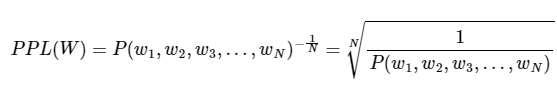
    
2. 문장 확률에 연쇄 법칙 (chain rule) 적용시
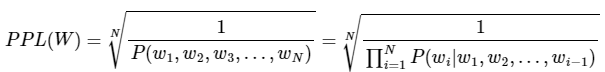

3. n-gram 적용시 (bigram)
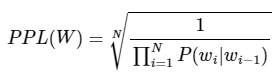


### 분기 계수로서의 PPL (branching factor)

- PPL = 경우의 수
- 언어 모델이 특정 시점(time step)에서 평균적으로 몇 개의 선택지를 가지고 고민하는 지
- PPL이 낮을수록 테스트 데이터 상에서 정확도가 높지만 사람이 직접 느끼기에 언어 모델의 성능이 좋다는 의미가 아님
- PPL은 테스트 데이터에 의존하므로, 두 개 이상의 언어 모델 비교시 많은 양의 데이터를 동일하게 적용하여 비교 측정해야 신뢰도가 높음

# 카운트 기반의 단어 표현( Count based Word Representation)
- 정의 : 카운트를 활용하여 수치화 (문자 -> 숫자)
- 자연어 처리에서 텍스트를 카운트 기반으로 표현하는 방법
- 정보 검색과 텍스트 마이닝 분야에서 주로 사용됨
    - 1. DTM (Document Term Matrix) : 빈도수 기반의 단어 표현
    - 2. TF-IDF(Term Frequency-Inverse Document Frequency) : 단어의 중요도에 따른 가중치 부여
- 기능 : 수치화가 끝난 후, 통계적인 접근 방법을 통해 특정 단어의 문서 내 중요도 측정, 문서의 핵심어 추출, 검색 엔진 내 검색 결과의 순위 결정, 문서 간 유사도 계산 가능

## 다양한 단어의 표현 방법
- 국소 표현 방법 (Local Representation)
    - = 이산 표현(Discrete Representation)
    - : 해당 단어 그 자체만 보고, 특정값을 맵핑하여 단어를 표현하는 방법
    - : 단어의 의미와 뉘앙스 표현 불가능
    - BoW, DTM, IF-IDF
        - ex) puppy(강아지), cute(귀여운), lovely(사랑스러운)라는 각 단어에 1번, 2번, 3번 등과 같은 숫자를 맵핑(mapping)하여 부여
- 분산 표현 방법(Distributed Representation)
    - = 연속 표현(Continuous Represnetation)
    - : 그 단어를 표현하고자 주변을 참고하여 단어를 표현하는 방법
    - : 단어의 의미와 뉘앙스 표현 가능
    - Word2Vec, FastText, Glove
        - ex) puppy(강아지)라는 단어 근처에는 주로 cute(귀여운), lovely(사랑스러운)이라는 단어가 자주 등장하므로, puppy라는 단어는 cute, lovely한 느낌이다로 단어를 정의
        - 참고) 연속 표현이 분산 표현을 포괄하는 더 큰 개념이라는 의견 존재 : 잠재 의미 분석(LSA)이나 잠재 디리클레 할당(LDA)과 같은 방법들은 단어의 의미를 표현할 수 있다는 점에서 연속 표현(Continuous Represnetation)이지만, 엄밀히 말해서 다른 접근의 방법론을 사용하고 있는 워드투벡터(Word2vec)와 같은 분산 표현(Distributed Representation)은 아닌 것으로 분류하여 연속 표현을 분산 표현을 포괄하고 있는 더 큰 개념으로 설명하기도 함

### 단어 표현의 카테고리화
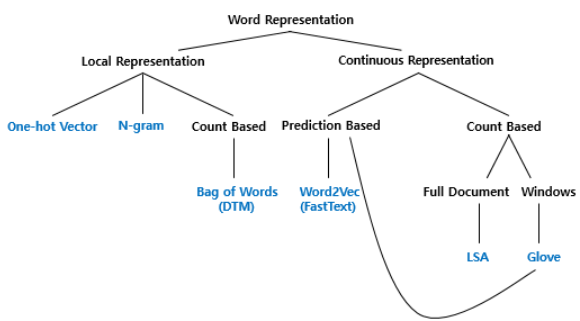
- Bag of Words : 국소 표현(Local Representation)에 속하며, 단어의 등장 순서를 고려하지 않고 빈도수를 카운트(Count)하여 단어를 수치화하는 단어 표현 방법
- DTM(또는 TDM) : BoW의 확장
- TF-IDF : 빈도수 기반 단어 표현에 단어의 중요도에 따른 가중치 부여


<Word Embedding 워드 임베딩>
- 워드투벡터(Word2Vec) : 연속 표현(Continuous Representation)에 속하면서, 예측(prediction)을 기반으로 단어의 뉘앙스를 표현
- 패스트텍스트(FastText) : Word2Vec의 확장
- 글로브(GloVe) : 예측과 카운트라는 두 가지 방법이 모두 사용된 것

## BoW
- Bag of Words : 단어들의  등장 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법
- 방법 :
    - 1. 각 단어에 고유한 정수 인덱스를 부여 # 단어 집합 생성
    - 2. 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터 생성
- 기능 :
    - BoW는 각 단어가 등장한 횟수를 수치화하는 텍스트 표현 방법이므로 주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰입니다.
    - 즉, 분류 문제나 여러 문서 간의 유사도를 구하는 문제에 주로 쓰입니다.
    - 가령, '달리기', '체력', '근력'과 같은 단어가 자주 등장하면 해당 문서를 체육 관련 문서로 분류할 수 있을 것이며, '미분', '방정식', '부등식'과 같은 단어가 자주 등장한다면 수학 관련 문서로 분류할 수 있습니다.

### 사용자 정의 함수 사용하기

In [70]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
    # 온점 제거 및 형태소 분석
    document = document.replace('.', '')
    tokenized_document = okt.morphs(document)

    word_to_index = {}
    bow = []

    for word in tokenized_document:  
        if word not in word_to_index.keys():
            word_to_index[word] = len(word_to_index)  
            # 처음 등장하는 단어 : BoW에 전부 기본값 1을 넣는다.
            bow.insert(len(word_to_index) - 1, 1)
        else:
            # 재등장하는 단어의 인덱스
            index = word_to_index.get(word)
            # 딕셔너리.get('키값') = 벨류값
            # 재등장한 단어 : BoW 내 해당하는 인덱스의 위치에 1을 더한다.
            bow[index] = bow[index] + 1

    return word_to_index, bow

In [72]:
# 예제1
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

# 만약 한국어에서 불용어에 해당되는 조사들 또한 제거한다면 더 정제된 BoW를 만들 수 있음
# 두 번 언급된 단어  : '가' & '물가상승률'

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [73]:
# 예제2
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)
# 두 번 언급된 단어 : '을'

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [75]:
# 예제3
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)
# 두 번 언급된 단어 : '가' & '하는' & '소비자' & '을' 
# 세 번 언급된 단어 : '물가상승률'

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


### 사이킷런의 CountVectorizer 사용하기
- 1. 기본적으로 길이가 2이상인 문자에 대해서만 토큰으로 인식하므로, 문자의 길이가 1이면 BoW에서 사라짐
- 2. 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만들기 때문에, 영어에서는 문제 없지만 한국어에서는 제대로 BoW가 생성되지 않을 수 있음
    - ex) 물가상승률이라는 단어를 인식하지 못하여 '물가상승률과' & '물가상승률은'을 서로 다른 두 단어로 인식하여 각자 다른 인덱스를 부여함

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

# 사라진 단어 : 'I'
# 두 번 등장한 단어 : 'love' & 'you'

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


### 불용어를 제거한 BoW 만들기
- CountVectorizer에서는 불용어를 지정시 불용어를 제외한 BoW 생성 가능

In [77]:
# 1. 사용자 정의 불용어
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [78]:
# 2. CountVectorizer에서 제공하는 자체 불용어
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


In [79]:
# 3. NLTK에서 지원하는 불용어
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


## DTM : 문서 단어 행렬 (Document-Term Matrix)
- 정의 :
    - 1. 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것
    - 2. 즉, 각 문서에 대한 BoW (단어의 빈도)를 하나의 행렬로 만든 것
- 기능 : 문서들을 서로 비교할 수 있도록 수치화 가능
- 참고 : 형태소 분석기로 단어 토큰화를 수행하고, 불용어에 해당되는 조사들 또한 제거하여 더욱 정제된 DTM 생성 가능
- 한계 :
    - 1. 희소 표현 (Sparse representation)
        - 각 행을 문서 벡터라고 했을 때, 각 문서 벡터의 차원은 원-핫 벡터와 마찬가지로 전체 단어 집합의 크기이므로 공간적 낭비 발생 가능
    - 2. 단순 빈도수 기반 접근
        - 각 문서에는 중요한 단어와 불필요한 단어들이 혼재되어 있으므로, 빈도수가 높은 불용어(stopwords)가 자연어 처리에 있어 중요하다고 판단하거나 문서 간 유사도 판단 기준으로 남용 가능
- 대안 :
    - 1. 대부분의 값이 0인 희소 행렬이므로 전처리를 통해 단어 집합의 크기 줄이기
        - 구두점, 빈도수가 낮은 단어, 불용어를 제거
        - 어간이나 표제어 추출을 통해 단어를 정규화
    - 2. TF-IDF : 불용어 & 중요한 단어에 대해 가중치 부여

## TF-IDF
- = Term Frequency-Inverse Document Frequency
- 단어의 빈도와 역 문서 빈도(문서의 빈도에 특성식을 취한 것)를 사용하여, DTM 내의 각 단어들의 중요도에 따라 가중치 부여하는 방법
- 방법 :
    - 1. DTM 생성
    - 2. TF-IDF 가중치 부여
- 기능 : 
    - 문서의 유사도를 구하는 작업
    - 검색 시스템에서 검색 결과의 중요도를 정하는 작업
    - 문서 내에서 특정 단어의 중요도를 구하는 작업 
- 특징 :
    - 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단
        - ex) 불용어(the, a)의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아짐
    - 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단
    - TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것

< TF-IDF = TF * IDF >

    - d : 문서
    - t : 단어
    - n : 문서의 총 개수
1. tf(d,t)
    - 특정 문서 d에서의 특정 단어 t의 등장 횟수
2. df(t)
    - 특정 단어 t가 등장한 문서의 수
3. idf(d, t)
    - df(t)에 반비례하는 수 (자연 로그 ln)
    - 로그 O / 역수 X
        - 1. 역수 사용시 총 문서의 수 n이 커질 수록, IDF가 기하급수적으로 커지기 때문
        - 2. 역수 사용시 비교적 자주 쓰이지 않는 희귀 단어들에 엄청난 가중치가 부여되기 때문
    - 1을 더하는 이유 : 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지하기 위한 것
    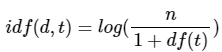

### 사용자 정의 함수 사용하기
- 기본적인 식을 바탕으로 한 구현에는 몇 가지 문제점이 존재하기 때문에 머신러닝 패키지의 조정된 식을 사용함
    - 1. 만약 전체 문서의 수n이 4인데, df(t)가 3인 경우, df(t)에 1이 더해지면서 log항의 분자와 분모의 값이 같아지게 됨
    - 2. log의 진수값이 1이 되면서 idf(d,t)의 값이 0이 됨
        - idf(d,t) = log ( n/(df(t)+1) ) = 0
    - 3. IDF = 0 이면 더 이상 가중치의 역할을 수행하지 못함
    - 4. 따라서 사이킷런의 TF-IDF 구현체 또한 위의 식에서 조정된 식을 사용함

In [80]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [82]:
# TF, IDF, TF-IDF 값 구하기

N = len(docs)  # 총 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df+1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [84]:
# TF 값 구하기 (DTM을 데이터프레임에 저장하기)

result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [85]:
# IDF 값 구하기

result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [87]:
# TF-IDF 행렬 출력하기

result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


### 사이킷런의 CountVectorizer와 TfidfVectorizer 사용하기

In [89]:
# DTM 

from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


### keras 사용하기
- 딥러닝 챕터의 다층 퍼셉트론의 텍스트 분류하기 참고하기

# 벡터의 유사도 (Vector Similarity)
- 문서의 유사도 성능 차이의 요인:
    - 1. 각 문서의 단어들을 어떤 방법으로 수치화하여 표현했는지(DTM, Word2Vec 등)
    - 2. 문서 간의 단어들의 차이를 어떤 방법(유클리드 거리, 코사인 유사도 등)으로 계산했는지에 따라 상이함
- 문서 유사도 측정 방법
    - 1. 코사인 유사도 (Cosine Similarity)
    - 2. 유클리드 거리 (Euclidean distance)
    - 3. 자카드 유사도 (Jaccard Similarity)

## 코사인 유사도 (Cosine Similarity)
- 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도
- -1 ~ +1 사이의 값을 가지며, 1에 가까울수록 유사도가 높은 것
    - 1 : 두 벡터의 방향이 0°로 완전히 동일한 경우
    - 0 : 두 벡터의 방향이 90°로 직각을 이루는 경우
    - -1 : 두 벡터의 방향이 180°로 반대인 경우
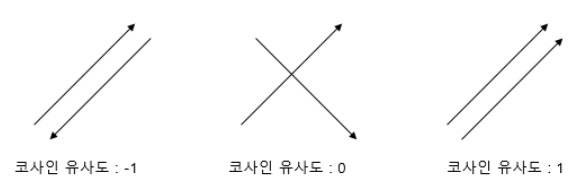
- 코사인 유사도 공식
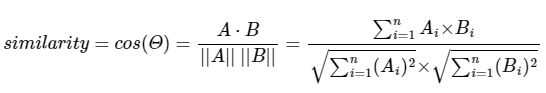

### numpy 사용하기

In [92]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

# 문서1과 문서2의 코사인 유사도 = 문서1과 문서3의 코사인 유사도
# 문서2와 문서3의 코사인 유사도 = 1 : 두 벡터의 방향이 완전히 동일한 경우

# 문서3은 문서2에서 단지 모든 단어의 빈도수가 1씩 증가했을 뿐
# 만약 유클리드 거리로 유사도를 연산했다면, 문서의 길이가 유사도 연산에 영향을 미치므로 문서 A가 문서 B보다 문서 C와 유사도가 더 높게 나왔겠지만,
# 코사인 유사도는 유사도를 구할 때 벡터의 방향(패턴)에 초점을 두므로, 코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교를 가능하게 함

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


### 사이킷런의 cosine_similarity 사용하기
- 좋아하는 영화를 입력하면, 해당 영화의 줄거리와 유사한 줄거리의 영화를 찾아서 추천하는 시스템
    - 코사인 유사도에 사용할 데이터 : 영화 제목에 해당하는 title열 & 줄거리에 해당하는 overview열

In [97]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [98]:
# 상위 2만개의 샘플을 data에 저장
data = data.head(20000)

# 훈련 데이터의 양을 줄이고 학습을 진행하고자 한다면 위와 같이 데이터를 줄여서 재저장

In [99]:
# TF-IDF 연산시 데이터에 Null 값이 들어있으면 에러가 발생하므로, TF-IDF의 대상이 되는 data의 overview 열에 결측값에 해당하는 Null 값이 있는지 확인하기

# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())

overview 열의 결측값의 수: 135


In [100]:
# 결측값을 빈 값으로 대체
data['overview'] = data['overview'].fillna('')

In [101]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

# 20,000개의 영화를 표현하기 위해서 총 47,487개의 단어가 사용되었음을 의미
# 즉, 47,847차원의 문서 벡터가 20,000개가 존재한다

TF-IDF 행렬의 크기(shape) : (20000, 47487)


In [102]:
# 20,000개의 문서 벡터에 대한 상호 간의 코사인 유사도 구하기
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

# 20,000개의 각 문서 벡터(영화 줄거리 벡터)와 자기 자신을 포함한 20,000개의 문서 벡터 간의 유사도가 기록된 행렬

코사인 유사도 연산 결과 : (20000, 20000)


In [103]:
# 기존 데이터프레임으로부터 영화의 타이틀을 key, 영화의 인덱스를 value로 하는 딕셔너리 title_to_index 만들기

title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

4


In [104]:
# 선택한 영화의 제목을 입력하면 코사인 유사도를 통해 가장 overview가 유사한 10개의 영화를 찾아내는 함수 만들기

def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data['title'].iloc[movie_indices]

In [105]:
# 영화 다크 나이트 라이즈와 overview가 유사한 영화 찾기

get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

## 유클리드 거리(Euclidean distance)
- 문서의 유사도 계산시 자카드 유사도나 코사인 유사도만큼, 유용한 방법은 아님
- 유클리드 거리의 값이 가장 작다는 것은 문서 간 거리가 가장 가깝다는 것을 의미

In [106]:
import numpy as np

def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print('문서1과 문서Q의 거리 :',dist(doc1,docQ))
print('문서2과 문서Q의 거리 :',dist(doc2,docQ))
print('문서3과 문서Q의 거리 :',dist(doc3,docQ))

# 유클리드 거리의 값이 가장 작으므로 문서1이 문서Q와 가장 유사하다

문서1과 문서Q의 거리 : 2.23606797749979
문서2과 문서Q의 거리 : 3.1622776601683795
문서3과 문서Q의 거리 : 2.449489742783178


## 자카드 유사도(Jaccard similarity)
- 합집합에서 교집합의 비율
- 0 ~ 1 사이의 값을 가짐
    - 1: 두 집합이 동일한 경우
    - 0: 두 집합의 공통 원소가 없는 경우
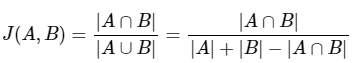    

- 두 개의 비교할 문서를 각각 doc1, doc2라고 했을 때, doc1와 doc2 간 문서의 유사도를 구하기 위한 자카드 유사도 공식
- 두 집합의 교집합 크기를 두 집합의 합집합 크기로 나눈 값
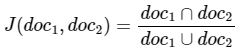

In [107]:
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print('문서1 :',tokenized_doc1)
print('문서2 :',tokenized_doc2)

문서1 : ['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
문서2 : ['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [108]:
union = set(tokenized_doc1).union(set(tokenized_doc2))
print('문서1과 문서2의 합집합 :',union)

문서1과 문서2의 합집합 : {'card', 'likey', 'banana', 'you', 'love', 'passport', 'watch', 'everyone', 'holder', 'like', 'coupon', 'apple'}


In [109]:
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print('문서1과 문서2의 교집합 :',intersection)

문서1과 문서2의 교집합 : {'apple', 'banana'}


In [110]:
print('자카드 유사도 :',len(intersection)/len(union))

자카드 유사도 : 0.16666666666666666


# 머신러닝 (Machine Learning)
- 주어진 데이터를 훈련(training) 또는 학습(learning)하여 기계(모델) 스스로 규칙성을 찾는 것
    - 훈련용 데이터 : 머신러닝 모델 학습 용도
    - 검증용 데이터 : 모델의 성능 조정 용도 (과적합 방지, 또는 하이퍼파라미터 튜닝 및 조정)
    - 테스트용 데이터 : 모델의 성능 평가 용도

분류 (Classification)
- 1. 이진 분류 (Binary Classification)
    - 두 개의 선택지 중 하나의 답을 선택
        - ex) 합격 vs 불합격 / 정상 vs 스팸 메일
- 2. 다중 클래스 (Multi-class Classification)
    - 세 개 이상의 선택지 중에서 답을 선택

회귀 (Regression)
- 연속적인 값의 범위 내에서 예측값이 나오는 경우
    - ex) 시계열 데이터(Time Series Data)를 이용한 주가 예측, 생산량 예측, 지수 예측

지도 학습 (Supervised Learning)
- 레이블(Label, 실제값 y)이라는 정답과 함께 학습

비지도 학습 (Unsupervised Learning)
-  별도의 레이블이 없이 학습
    - ex) 텍스트 처리 분야의 토픽 모델링 알고리즘 (LSA, LDA)
    
강화 학습

자기지도 학습 (Self-Supervised Learning, SSL)
- 레이블이 없는 데이터가 주어지면, 모델이 학습을 위해서 스스로 데이터로부터 레이블을 만들어서 학습하는 경우
    - ex) Word2Vec과 같은 워드 임베딩 알고리즘 / BERT와 같은 언어 모델의 학습 방법

- 독립 변수 x = feature
- 종속 변수 y = label

혼동 행렬(Confusion Matrix)
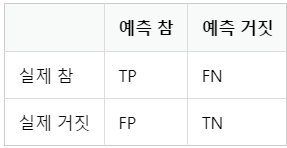

- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)

- 1. 정밀도(Precision)
    - 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율
    - TP / (TP+FP)
- 2. 재현율(Recall)
    - 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
    - TP / (TP+FN)
- 3. 정확도(Accuracy)
    - 전체 예측한 데이터 중에서 정답을 맞춘 것에 대한 비율
    - (TP+TN) / (TP+FN+FP+TN)
    - 스팸 메일과 같이 전체 데이터에서 너무 적은 비율을 차지한다면 정확도가 아닌 F1-Score로 모델 성능 평가가 더 낫다


과적합(Overfitting)과 과소 적합(Underfitting)
- 1. 과적합(Overfitting)
    - 훈련 데이터를 과하게 학습하여 발생하는 현상
    - 훈련 데이터에서는 오차가 낮지만, 테스트 데이터에서는 오차가 큰 경우
        - 훈련 데이터에 대해서만 과하게 학습하면 성능 측정을 위한 데이터인 테스트 데이터나 실제 서비스에서는 정확도가 좋지 않은 현상이 발생할 수 있음
    - 에포크(epoch, 전체 훈련 데이터에 대한 훈련 횟수)가 지나치게 크면 과적합이 발생하여 정확도가 감소
    - 대안 : 테스트 데이터의 오차가 증가하기 전, 또는 정확도가 감소하기 전에 훈련을 멈추기
    - 딥러닝 : 드롭 아웃(Dropout), 조기 종료(Early Stopping) 등의 방법으로 과적합 방지
- 2. 과소적합(Underfitting)
    - 훈련 데이터를 적게 학습하여 발생하는 현상
    - 테스트 데이터의 성능이 올라갈 여지가 있음에도 훈련을 덜 한 상태
    - 에포크가 지나치게 적으면 훈련 자체가 부족하여 과소적합이 발생하여 정확도가 감소

<pre>
<딥러닝>
Step 1. 주어진 데이터를 훈련 데이터, 검증 데이터, 테스트 데이터로 나눈다. 가령, 6:2:2 비율로 나눌 수 있다.
Step 2. 훈련 데이터로 모델을 학습한다. (에포크 +1)
Step 3. 검증 데이터로 모델을 평가하여 검증 데이터에 대한 정확도와 오차(loss)를 계산한다.
Step 4. 검증 데이터의 오차가 증가하였다면 과적합 징후이므로 학습 종료 후 Step 5로 이동, 아니라면 Step 2.로 재이동한다.
Step 5. 모델의 학습이 종료되었으니 테스트 데이터로 모델을 평가한다.
</pre>

## 선형 회귀 (Linear Regression)

<종류>
- 1. 단순 선형 회귀 분석 (Simple Linear Regression Analysis)
    - 한 개의 독립 변수 x와 종속변수 y의 선형 관계를 모델링
    - y = wx +b
        - w : 가중치 (weight) : 직선의 기울기
        - b : 편향 (bias) : 절편
- 2. 다중 선형 회귀 분석 (Multiple Linear Regression Analysis)
    - 다수의 독립변수 x1, x2, ..., xn와 종속변수 y의 선형 관계를 모델링
    - y = w1x1 + w2x2 + ... + wnxn

<목적>
- 오차를 최소화하는 최적의 w와 b 찾기

<방법>
- 1. 가설 세우기 (Hypothesis)
    - H(x) = wx + b
- 2. 오차 구하기 (실제값-예측값)
    - 목적함수(Objective Function) : 함수의 값을 최소화하거나, 최대화하거나 하는 목적을 가진 함수
    - 비용 함수(Cost Function) = 손실 함수(Loss Function) : 함수의 값을 최소화하는 목적을 가진 함수
    - 평균 제곱 오차(Mean Squared Error, MSE)
        - 오차의 제곱합에 대한 평균
        - 오차가 클수록 평균 제곱 오차는 커지고, 오차가 작아질수록 평균 제곱 오차는 작아지므로, Cost(w,b)를 최소가 되게 만드는 최적의 w와 b를 구해야 함 
        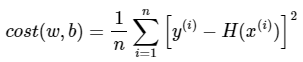
- 3. 오차가 최소화되는 최적의 w와 b 구하기
    - 옵티마이저(Optimizer) : 경사하강법(Gradient Descent)
        - 기울기가 지나치게 크거나 작으면 실제값과 예측값의 오차가 커짐
        - cost, 즉 오차가 최소화되는 지점은 접선의 기울기(미분값)가 0이 되는 지점
        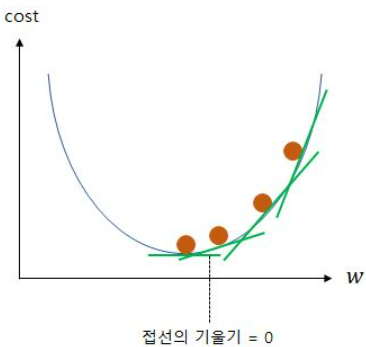
        - 0~1 사이의 값을 갖는 a (학습률 learning rate)으로 기울기 w을 얼마나 크게 변경할 지 결정
        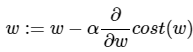

### tensorflow의 tape_gradient를 사용한 선형 회귀 구현

In [111]:
import tensorflow as tf

w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z

with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
print(gradients) # w에 대해 미분한 값 저장

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [114]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

@tf.function
def hypothesis(x):
    return w*x + b

x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [115]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [116]:
# 옵티마이저 : 학습률이 0.01인 경사 하강법
optimizer = tf.optimizers.SGD(0.01)

for i in range(301):
    with tf.GradientTape() as tape:
      # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
      y_pred = hypothesis(x)

      # 평균 제곱 오차를 계산
      cost = mse_loss(y_pred, y)

    # 손실 함수에 대한 파라미터의 미분값 계산
    gradients = tape.gradient(cost, [w, b])

    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if i % 10 == 0:
        print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

### keras를 사용한 선형 회귀 구현

[Kss]: `lr` is deprecated, please use `learning_rate` instead, or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.SGD.


Epoch 1/300
1/1 [==============================] - 0s 468ms/step - loss: 3208.7871 - mse: 3208.7871
Epoch 2/300
1/1 [==============================] - 0s 0s/step - loss: 395.8510 - mse: 395.8510
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 49.7393 - mse: 49.7393
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 7.1520 - mse: 7.1520
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 1.9111 - mse: 1.9111
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 1.2654 - mse: 1.2654
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 1.1851 - mse: 1.1851
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 1.1744 - mse: 1.1744
Epoch 9/300
1/1 [==============================] - 0s 0s/step - loss: 1.1723 - mse: 1.1723
Epoch 10/300
1/1 [==============================] - 0s 18ms/step - loss: 1.1713 - mse: 1.1713
Epoch 11/300
1/1 [==============================] - 0s 0s/step

1/1 [==============================] - 0s 8ms/step - loss: 1.1180 - mse: 1.1180
Epoch 90/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1175 - mse: 1.1175
Epoch 91/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1170 - mse: 1.1170
Epoch 92/300
1/1 [==============================] - 0s 9ms/step - loss: 1.1166 - mse: 1.1166
Epoch 93/300
1/1 [==============================] - 0s 16ms/step - loss: 1.1161 - mse: 1.1161
Epoch 94/300
1/1 [==============================] - 0s 16ms/step - loss: 1.1156 - mse: 1.1156
Epoch 95/300
1/1 [==============================] - 0s 17ms/step - loss: 1.1152 - mse: 1.1152
Epoch 96/300
1/1 [==============================] - 0s 8ms/step - loss: 1.1147 - mse: 1.1147
Epoch 97/300
1/1 [==============================] - 0s 16ms/step - loss: 1.1143 - mse: 1.1143
Epoch 98/300
1/1 [==============================] - 0s 16ms/step - loss: 1.1138 - mse: 1.1138
Epoch 99/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1134

1/1 [==============================] - 0s 11ms/step - loss: 1.0738 - mse: 1.0738
Epoch 264/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0736 - mse: 1.0736
Epoch 265/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0735 - mse: 1.0735
Epoch 266/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0734 - mse: 1.0734
Epoch 267/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0733 - mse: 1.0733
Epoch 268/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0732 - mse: 1.0732
Epoch 269/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0731 - mse: 1.0731
Epoch 270/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0730 - mse: 1.0730
Epoch 271/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0729 - mse: 1.0729
Epoch 272/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0728 - mse: 1.0728
Epoch 273/300
1/1 [==============================] - 0s 7ms/step - loss: 

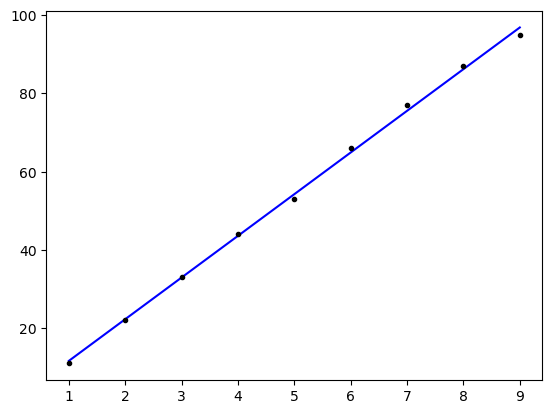

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

1/1 [==============================] - 0s 34ms/step


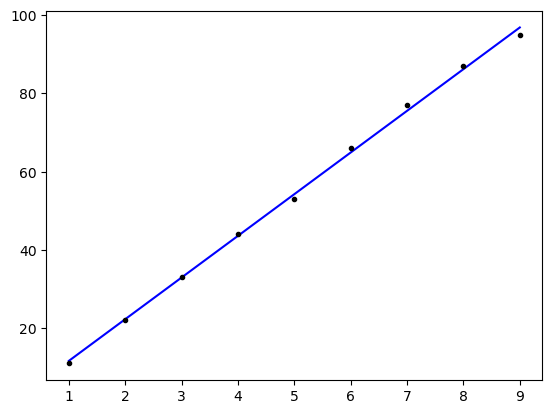

In [118]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [119]:
print(model.predict([9.5]))
# 9시간 30분을 공부하면 약 102.2점을 얻는다고 예측하고 있음

1/1 [==============================] - 0s 72ms/step
[[102.1853]]


## 로지스틱 회귀 (Logistic Regression)

### 이진 분류 (Binary Classification)
- 정의 : 두 개의 선택지 중에서 정답을 고르는 것
- 목적 : 최적의 가중치 w와 b를 구하는 것
- 방법 :
    - 1. 시그모이드 함수(Sigmoid function)
        - : 실제값(레이블)에 해당하는 y가 0 또는 1의 값만 가지므로, 예측값도 0과 1사이의 값을 가지도록 함
             - 최종 예측값이 0.5보다 작으면 : 0으로 예측했다고 판단
             - 최종 예측값이 0.5보다 크면 : 1로 예측했다고 판단
             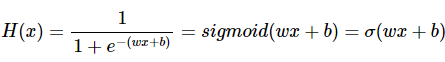
             - e(e=2.718281...) : 자연 상수라 불리는 숫자
    - 2. 크로스 엔트로피 함수 (Cross Entropy)
        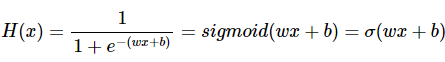
            - n : 샘플 데이터의 개수
            - yi : 실제값
            - H(xi) : 예측값
        - 로지스틱 회귀 또한 경사 하강법을 사용하여 가중치 w를 찾아내지만, 비용 함수로는 평균 제곱 오차가 아닌 엔트로피를 사용함 (mse 사용시 로컬 미니멈에 빠질 가능성이 지나치게 높음)

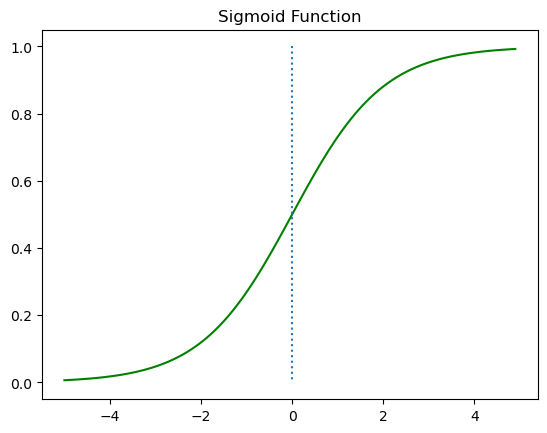

In [120]:
# 시그모이드 함수 시각화

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

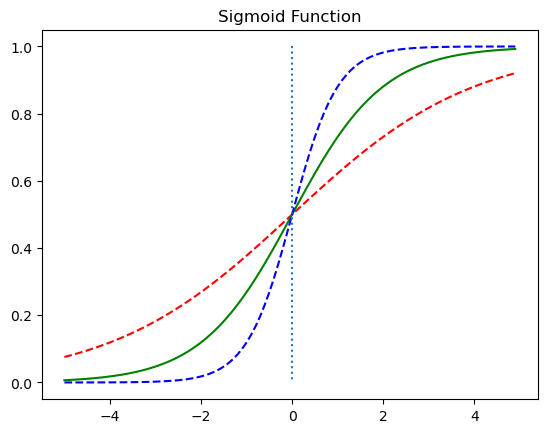

In [122]:
# w 값에 따른 함수의 변화

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w의 값이 0.5일때
plt.plot(x, y2, 'g') # w의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # w의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

 
# w는 직선의 기울기가 아닌 "그래프의 경사도"
# 빨간색 : w의 값이 0.5
# 초록색 : w의 값이 1.0
# 파란색 : w의 값이 2.0

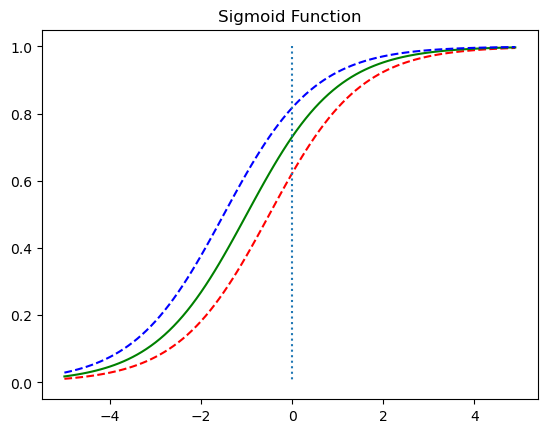

In [123]:
# b 값에 따른 함수의 변화

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

# b의 값에 따라 그래프가 좌우로 이동

### keras를 사용한 로지스틱 회귀 구현

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))


# 옵티마이저 : 가장 기본적인 경사 하강법인 sgd
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

[Kss]: `lr` is deprecated, please use `learning_rate` instead, or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.SGD.


Epoch 1/200
1/1 [==============================] - 0s 466ms/step - loss: 0.4342 - binary_accuracy: 0.9231
Epoch 2/200
1/1 [==============================] - 0s 13ms/step - loss: 0.4326 - binary_accuracy: 0.9231
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 0.4311 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 0.4295 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 6ms/step - loss: 0.4279 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 0.4264 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 0.4248 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 4ms/step - loss: 0.4232 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 0.4217 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 0s/ste

1/1 [==============================] - 0s 167us/step - loss: 0.2214 - binary_accuracy: 0.9231
Epoch 157/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2205 - binary_accuracy: 0.9231
Epoch 158/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2195 - binary_accuracy: 0.9231
Epoch 159/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2186 - binary_accuracy: 0.9231
Epoch 160/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2177 - binary_accuracy: 0.9231
Epoch 161/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2168 - binary_accuracy: 0.9231
Epoch 162/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2159 - binary_accuracy: 0.9231
Epoch 163/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2150 - binary_accuracy: 0.9231
Epoch 164/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2141 - binary_accuracy: 0.9231
Epoch 165/200
1/1 [==============================] - 0s 0s

1/1 [==============================] - 0s 45ms/step


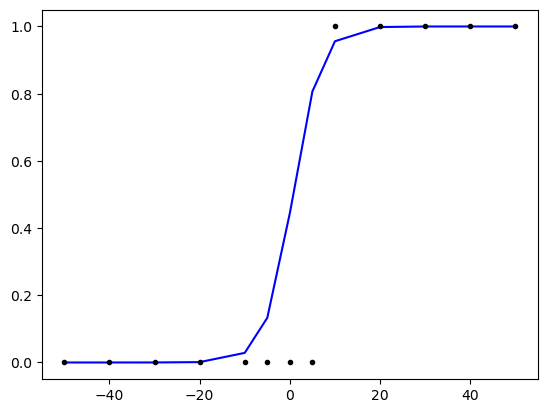

In [125]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')

In [126]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

# x의 값이 5보다 작을 때는 0.5보다 작은 값을 출력
# x의 값이 10보다 클 때는 0.5보다 큰 값을 출력

1/1 [==============================] - 0s 77ms/step
[[0.5266683 ]
 [0.60754997]
 [0.6829312 ]
 [0.74979615]
 [0.779482  ]]
1/1 [==============================] - 0s 18ms/step
[[0.9679932 ]
 [0.99878496]
 [0.99995524]
 [0.99999833]
 [1.        ]]


### 다중 선형 회귀
- 독립 변수 x가 2개 이상인 경우에 대해서 학습
- 비용 함수와 옵티마이저 등을 사용하는 방법은 동일


In [127]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]]) 
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)

print(model.predict(X))

[Kss]: `lr` is deprecated, please use `learning_rate` instead, or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.SGD.


Epoch 1/2000
1/1 [==============================] - 0s 220ms/step - loss: 2296.2183 - mse: 2296.2183
Epoch 2/2000
1/1 [==============================] - 0s 0s/step - loss: 65504448.0000 - mse: 65504448.0000
Epoch 3/2000
1/1 [==============================] - 0s 17ms/step - loss: 1929072214016.0000 - mse: 1929072214016.0000
Epoch 4/2000
1/1 [==============================] - 0s 5ms/step - loss: 56810348467978240.0000 - mse: 56810348467978240.0000
Epoch 5/2000
1/1 [==============================] - 0s 762us/step - loss: 1673040818196982005760.0000 - mse: 1673040818196982005760.0000
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 49270340307046563743531008.0000 - mse: 49270340307046563743531008.0000
Epoch 7/2000
1/1 [==============================] - 0s 3ms/step - loss: 1450990698749068344472708841472.0000 - mse: 1450990698749068344472708841472.0000
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 42731065723248042083334982069125120.0000 - ms

1/1 [==============================] - 0s 4ms/step - loss: nan - mse: nan
Epoch 183/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 184/2000
1/1 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 185/2000
1/1 [==============================] - 0s 4ms/step - loss: nan - mse: nan
Epoch 186/2000
1/1 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 187/2000
1/1 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 188/2000
1/1 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 189/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 190/2000
1/1 [==============================] - 0s 4ms/step - loss: nan - mse: nan
Epoch 191/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 192/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 193/2000
1/1 [=================

1/1 [==============================] - 0s 8ms/step - loss: nan - mse: nan
Epoch 367/2000
1/1 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 368/2000
1/1 [==============================] - 0s 9ms/step - loss: nan - mse: nan
Epoch 369/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 370/2000
1/1 [==============================] - 0s 22ms/step - loss: nan - mse: nan
Epoch 371/2000
1/1 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 372/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 373/2000
1/1 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 374/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 375/2000
1/1 [==============================] - 0s 17ms/step - loss: nan - mse: nan
Epoch 376/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 377/2000
1/1 [=================

1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 551/2000
1/1 [==============================] - 0s 10ms/step - loss: nan - mse: nan
Epoch 552/2000
1/1 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 553/2000
1/1 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 554/2000
1/1 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 555/2000
1/1 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 556/2000
1/1 [==============================] - 0s 13ms/step - loss: nan - mse: nan
Epoch 557/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 558/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 559/2000
1/1 [==============================] - 0s 533us/step - loss: nan - mse: nan
Epoch 560/2000
1/1 [==============================] - 0s 16ms/step - loss: nan - mse: nan
Epoch 561/2000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 735/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 736/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 737/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 738/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 739/2000
1/1 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 740/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 741/2000
1/1 [==============================] - 0s 17ms/step - loss: nan - mse: nan
Epoch 742/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 743/2000
1/1 [==============================] - 0s 4ms/step - loss: nan - mse: nan
Epoch 744/2000
1/1 [==============================] - 0s 9ms/step - loss: nan - mse: nan
Epoch 745/2000
1/1 [================

1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 919/2000
1/1 [==============================] - 0s 16ms/step - loss: nan - mse: nan
Epoch 920/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 921/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 922/2000
1/1 [==============================] - 0s 4ms/step - loss: nan - mse: nan
Epoch 923/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 924/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 925/2000
1/1 [==============================] - 0s 13ms/step - loss: nan - mse: nan
Epoch 926/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 927/2000
1/1 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 928/2000
1/1 [==============================] - 0s 9ms/step - loss: nan - mse: nan
Epoch 929/2000
1/1 [==================

1/1 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 1011/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 1012/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 1013/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 1014/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 1015/2000
1/1 [==============================] - 0s 632us/step - loss: nan - mse: nan
Epoch 1016/2000
1/1 [==============================] - 0s 8ms/step - loss: nan - mse: nan
Epoch 1017/2000
1/1 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 1018/2000
1/1 [==============================] - 0s 8ms/step - loss: nan - mse: nan
Epoch 1019/2000
1/1 [==============================] - 0s 4ms/step - loss: nan - mse: nan
Epoch 1020/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 1021/2000
1/1 [===

1/1 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 1102/2000
1/1 [==============================] - 0s 8ms/step - loss: nan - mse: nan
Epoch 1103/2000
1/1 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 1104/2000
1/1 [==============================] - 0s 4ms/step - loss: nan - mse: nan
Epoch 1105/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 1106/2000
1/1 [==============================] - 0s 17ms/step - loss: nan - mse: nan
Epoch 1107/2000
1/1 [==============================] - 0s 9ms/step - loss: nan - mse: nan
Epoch 1108/2000
1/1 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 1109/2000
1/1 [==============================] - 0s 15ms/step - loss: nan - mse: nan
Epoch 1110/2000
1/1 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 1111/2000
1/1 [==============================] - 0s 15ms/step - loss: nan - mse: nan
Epoch 1112/2000
1/1 [===

1/1 [==============================] - 0s 528us/step - loss: nan - mse: nan
Epoch 1284/2000
1/1 [==============================] - 0s 15ms/step - loss: nan - mse: nan
Epoch 1285/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 1286/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 1287/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 1288/2000
1/1 [==============================] - 0s 16ms/step - loss: nan - mse: nan
Epoch 1289/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 1290/2000
1/1 [==============================] - 0s 16ms/step - loss: nan - mse: nan
Epoch 1291/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 1292/2000
1/1 [==============================] - 0s 17ms/step - loss: nan - mse: nan
Epoch 1293/2000
1/1 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 1294/2000
1/1 [====

1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 1466/2000
1/1 [==============================] - 0s 17ms/step - loss: nan - mse: nan
Epoch 1467/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 1468/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 1469/2000
1/1 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 1470/2000
1/1 [==============================] - 0s 10ms/step - loss: nan - mse: nan
Epoch 1471/2000
1/1 [==============================] - 0s 4ms/step - loss: nan - mse: nan
Epoch 1472/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 1473/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 1474/2000
1/1 [==============================] - 0s 0s/step - loss: nan - mse: nan
Epoch 1475/2000
1/1 [==============================] - 0s 16ms/step - loss: nan - mse: nan
Epoch 1476/2000
1/1 [=======

1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 1648/2000
1/1 [==============================] - 0s 4ms/step - loss: nan - mse: nan
Epoch 1649/2000
1/1 [==============================] - 0s 9ms/step - loss: nan - mse: nan
Epoch 1650/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 1651/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 1652/2000
1/1 [==============================] - 0s 8ms/step - loss: nan - mse: nan
Epoch 1653/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 1654/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 1655/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 1656/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 1657/2000
1/1 [==============================] - 0s 6ms/step - loss: nan - mse: nan
Epoch 1658/2000
1/1 [=====

1/1 [==============================] - 0s 11ms/step - loss: nan - mse: nan
Epoch 1830/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 1831/2000
1/1 [==============================] - 0s 20ms/step - loss: nan - mse: nan
Epoch 1832/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 1833/2000
1/1 [==============================] - 0s 4ms/step - loss: nan - mse: nan
Epoch 1834/2000
1/1 [==============================] - 0s 7ms/step - loss: nan - mse: nan
Epoch 1835/2000
1/1 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 1836/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 1837/2000
1/1 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 1838/2000
1/1 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 1839/2000
1/1 [==============================] - 0s 5ms/step - loss: nan - mse: nan
Epoch 1840/2000
1/1 [===

[Kss]: 5 out of the last 7 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001C56C5EDEE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 64ms/step
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [128]:
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

1/1 [==============================] - 0s 22ms/step
[[nan]
 [nan]]


### 다중 로지스틱 회귀
- y를 결정하는데 있어 독립 변수 x가 2개인 로지스틱 회귀
- ex) iris 붓꽃 데이터


In [129]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, epochs=2000)

print(model.predict(X))

# 입력의 합이 2이상인 경우에는 전부 값이 0.5를 넘음

Epoch 1/2000
1/1 [==============================] - 0s 295ms/step - loss: 0.6369 - binary_accuracy: 0.6667
Epoch 2/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6359 - binary_accuracy: 0.6667
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6350 - binary_accuracy: 0.6667
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6340 - binary_accuracy: 0.6667
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6331 - binary_accuracy: 0.6667
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6321 - binary_accuracy: 0.6667
Epoch 7/2000
1/1 [==============================] - 0s 0s/step - loss: 0.6312 - binary_accuracy: 0.6667
Epoch 8/2000
1/1 [==============================] - 0s 0s/step - loss: 0.6303 - binary_accuracy: 0.6667
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6294 - binary_accuracy: 0.6667
Epoch 10/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 0s/step - loss: 0.5309 - binary_accuracy: 0.6667
Epoch 156/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.5304 - binary_accuracy: 0.6667
Epoch 157/2000
1/1 [==============================] - 0s 0s/step - loss: 0.5299 - binary_accuracy: 0.6667
Epoch 158/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.5295 - binary_accuracy: 0.6667
Epoch 159/2000
1/1 [==============================] - 0s 0s/step - loss: 0.5290 - binary_accuracy: 0.6667
Epoch 160/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.5286 - binary_accuracy: 0.6667
Epoch 161/2000
1/1 [==============================] - 0s 0s/step - loss: 0.5281 - binary_accuracy: 0.6667
Epoch 162/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.5277 - binary_accuracy: 0.6667
Epoch 163/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.5272 - binary_accuracy: 0.6667
Epoch 164/2000
1/1 [==============================] 

1/1 [==============================] - 0s 16ms/step - loss: 0.4795 - binary_accuracy: 0.6667
Epoch 308/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4792 - binary_accuracy: 0.6667
Epoch 309/2000
1/1 [==============================] - 0s 0s/step - loss: 0.4790 - binary_accuracy: 0.6667
Epoch 310/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4787 - binary_accuracy: 0.6667
Epoch 311/2000
1/1 [==============================] - 0s 0s/step - loss: 0.4785 - binary_accuracy: 0.6667
Epoch 312/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.4783 - binary_accuracy: 0.6667
Epoch 313/2000
1/1 [==============================] - 0s 0s/step - loss: 0.4780 - binary_accuracy: 0.6667
Epoch 314/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.4778 - binary_accuracy: 0.6667
Epoch 315/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4776 - binary_accuracy: 0.6667
Epoch 316/2000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.4508 - binary_accuracy: 0.6667
Epoch 460/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4506 - binary_accuracy: 0.6667
Epoch 461/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4505 - binary_accuracy: 0.6667
Epoch 462/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4503 - binary_accuracy: 0.6667
Epoch 463/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4502 - binary_accuracy: 0.6667
Epoch 464/2000
1/1 [==============================] - 0s 0s/step - loss: 0.4500 - binary_accuracy: 0.6667
Epoch 465/2000
1/1 [==============================] - 0s 0s/step - loss: 0.4499 - binary_accuracy: 0.6667
Epoch 466/2000
1/1 [==============================] - 0s 0s/step - loss: 0.4497 - binary_accuracy: 0.6667
Epoch 467/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4496 - binary_accuracy: 0.6667
Epoch 468/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 8ms/step - loss: 0.4308 - binary_accuracy: 0.6667
Epoch 612/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4307 - binary_accuracy: 0.6667
Epoch 613/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4305 - binary_accuracy: 0.6667
Epoch 614/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4304 - binary_accuracy: 0.6667
Epoch 615/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4303 - binary_accuracy: 0.6667
Epoch 616/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4302 - binary_accuracy: 0.6667
Epoch 617/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4301 - binary_accuracy: 0.6667
Epoch 618/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4300 - binary_accuracy: 0.6667
Epoch 619/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4298 - binary_accuracy: 0.6667
Epoch 620/2000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.4143 - binary_accuracy: 0.8333
Epoch 764/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4142 - binary_accuracy: 0.8333
Epoch 765/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4141 - binary_accuracy: 0.8333
Epoch 766/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4140 - binary_accuracy: 0.8333
Epoch 767/2000
1/1 [==============================] - 0s 0s/step - loss: 0.4139 - binary_accuracy: 0.8333
Epoch 768/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4138 - binary_accuracy: 0.8333
Epoch 769/2000
1/1 [==============================] - 0s 0s/step - loss: 0.4137 - binary_accuracy: 0.8333
Epoch 770/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4136 - binary_accuracy: 0.8333
Epoch 771/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4135 - binary_accuracy: 0.8333
Epoch 772/2000
1/1 [==============================] - 

1/1 [==============================] - 0s 0s/step - loss: 0.3997 - binary_accuracy: 1.0000
Epoch 916/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3997 - binary_accuracy: 1.0000
Epoch 917/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3996 - binary_accuracy: 1.0000
Epoch 918/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3995 - binary_accuracy: 1.0000
Epoch 919/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3994 - binary_accuracy: 1.0000
Epoch 920/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3993 - binary_accuracy: 1.0000
Epoch 921/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.3992 - binary_accuracy: 1.0000
Epoch 922/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3991 - binary_accuracy: 1.0000
Epoch 923/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.3990 - binary_accuracy: 1.0000
Epoch 924/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 16ms/step - loss: 0.3864 - binary_accuracy: 1.0000
Epoch 1068/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3864 - binary_accuracy: 1.0000
Epoch 1069/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3863 - binary_accuracy: 1.0000
Epoch 1070/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3862 - binary_accuracy: 1.0000
Epoch 1071/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3861 - binary_accuracy: 1.0000
Epoch 1072/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3860 - binary_accuracy: 1.0000
Epoch 1073/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3859 - binary_accuracy: 1.0000
Epoch 1074/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3858 - binary_accuracy: 1.0000
Epoch 1075/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3858 - binary_accuracy: 1.0000
Epoch 1076/2000
1/1 [========================

1/1 [==============================] - 0s 4ms/step - loss: 0.3742 - binary_accuracy: 1.0000
Epoch 1219/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.3741 - binary_accuracy: 1.0000
Epoch 1220/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.3741 - binary_accuracy: 1.0000
Epoch 1221/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3740 - binary_accuracy: 1.0000
Epoch 1222/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3739 - binary_accuracy: 1.0000
Epoch 1223/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3738 - binary_accuracy: 1.0000
Epoch 1224/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3737 - binary_accuracy: 1.0000
Epoch 1225/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3737 - binary_accuracy: 1.0000
Epoch 1226/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3736 - binary_accuracy: 1.0000
Epoch 1227/2000
1/1 [=======================

1/1 [==============================] - 0s 10ms/step - loss: 0.3684 - binary_accuracy: 1.0000
Epoch 1295/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.3683 - binary_accuracy: 1.0000
Epoch 1296/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3682 - binary_accuracy: 1.0000
Epoch 1297/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.3682 - binary_accuracy: 1.0000
Epoch 1298/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3681 - binary_accuracy: 1.0000
Epoch 1299/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.3680 - binary_accuracy: 1.0000
Epoch 1300/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3679 - binary_accuracy: 1.0000
Epoch 1301/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3679 - binary_accuracy: 1.0000
Epoch 1302/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3678 - binary_accuracy: 1.0000
Epoch 1303/2000
1/1 [======================

1/1 [==============================] - 0s 5ms/step - loss: 0.3628 - binary_accuracy: 1.0000
Epoch 1371/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3627 - binary_accuracy: 1.0000
Epoch 1372/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.3626 - binary_accuracy: 1.0000
Epoch 1373/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3626 - binary_accuracy: 1.0000
Epoch 1374/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3625 - binary_accuracy: 1.0000
Epoch 1375/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3624 - binary_accuracy: 1.0000
Epoch 1376/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.3623 - binary_accuracy: 1.0000
Epoch 1377/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.3623 - binary_accuracy: 1.0000
Epoch 1378/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3622 - binary_accuracy: 1.0000
Epoch 1379/2000
1/1 [========================

1/1 [==============================] - 0s 16ms/step - loss: 0.3521 - binary_accuracy: 1.0000
Epoch 1523/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3520 - binary_accuracy: 1.0000
Epoch 1524/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3520 - binary_accuracy: 1.0000
Epoch 1525/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3519 - binary_accuracy: 1.0000
Epoch 1526/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3518 - binary_accuracy: 1.0000
Epoch 1527/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3518 - binary_accuracy: 1.0000
Epoch 1528/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3517 - binary_accuracy: 1.0000
Epoch 1529/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.3516 - binary_accuracy: 1.0000
Epoch 1530/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.3516 - binary_accuracy: 1.0000
Epoch 1531/2000
1/1 [======================

1/1 [==============================] - 0s 0s/step - loss: 0.3470 - binary_accuracy: 1.0000
Epoch 1599/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3470 - binary_accuracy: 1.0000
Epoch 1600/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3469 - binary_accuracy: 1.0000
Epoch 1601/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3468 - binary_accuracy: 1.0000
Epoch 1602/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3468 - binary_accuracy: 1.0000
Epoch 1603/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3467 - binary_accuracy: 1.0000
Epoch 1604/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3467 - binary_accuracy: 1.0000
Epoch 1605/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.3466 - binary_accuracy: 1.0000
Epoch 1606/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3465 - binary_accuracy: 1.0000
Epoch 1607/2000
1/1 [==========================

1/1 [==============================] - 0s 16ms/step - loss: 0.3421 - binary_accuracy: 1.0000
Epoch 1675/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3421 - binary_accuracy: 1.0000
Epoch 1676/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3420 - binary_accuracy: 1.0000
Epoch 1677/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3419 - binary_accuracy: 1.0000
Epoch 1678/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3419 - binary_accuracy: 1.0000
Epoch 1679/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3418 - binary_accuracy: 1.0000
Epoch 1680/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.3418 - binary_accuracy: 1.0000
Epoch 1681/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3417 - binary_accuracy: 1.0000
Epoch 1682/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.3416 - binary_accuracy: 1.0000
Epoch 1683/2000
1/1 [=====================

Epoch 1750/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3374 - binary_accuracy: 1.0000
Epoch 1751/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3373 - binary_accuracy: 1.0000
Epoch 1752/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3373 - binary_accuracy: 1.0000
Epoch 1753/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3372 - binary_accuracy: 1.0000
Epoch 1754/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3371 - binary_accuracy: 1.0000
Epoch 1755/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3371 - binary_accuracy: 1.0000
Epoch 1756/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3370 - binary_accuracy: 1.0000
Epoch 1757/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3369 - binary_accuracy: 1.0000
Epoch 1758/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.3369 - binary_accuracy: 1.0000
Epoch 1759/2000
1/1 [=======

1/1 [==============================] - 0s 3ms/step - loss: 0.3284 - binary_accuracy: 1.0000
Epoch 1902/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.3283 - binary_accuracy: 1.0000
Epoch 1903/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3282 - binary_accuracy: 1.0000
Epoch 1904/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3282 - binary_accuracy: 1.0000
Epoch 1905/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3281 - binary_accuracy: 1.0000
Epoch 1906/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.3281 - binary_accuracy: 1.0000
Epoch 1907/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.3280 - binary_accuracy: 1.0000
Epoch 1908/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3280 - binary_accuracy: 1.0000
Epoch 1909/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.3279 - binary_accuracy: 1.0000
Epoch 1910/2000
1/1 [=======================

Epoch 1977/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3240 - binary_accuracy: 1.0000
Epoch 1978/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3240 - binary_accuracy: 1.0000
Epoch 1979/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3239 - binary_accuracy: 1.0000
Epoch 1980/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3238 - binary_accuracy: 1.0000
Epoch 1981/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3238 - binary_accuracy: 1.0000
Epoch 1982/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3237 - binary_accuracy: 1.0000
Epoch 1983/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3237 - binary_accuracy: 1.0000
Epoch 1984/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.3236 - binary_accuracy: 1.0000
Epoch 1985/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3236 - binary_accuracy: 1.0000
Epoch 1986/2000
1/1 [=======

[Kss]: 6 out of the last 9 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001C56C4573A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 [==============================] - 0s 33ms/step
[[0.12361705]
 [0.42136657]
 [0.41871867]
 [0.7898933 ]
 [0.78808373]
 [0.7862628 ]]


### 인공 신경망 다이어그램
- 다중 로지스틱 회귀를 인공 신경망의 형태로 표현하기
- 아직 인공 신경망을 배우지 않았음에도 이렇게 다이어그램으로 표현해보는 이유는 로지스틱 회귀를 일종의 인공 신경망 구조로 해석해도 무방함을 보여주기 위함

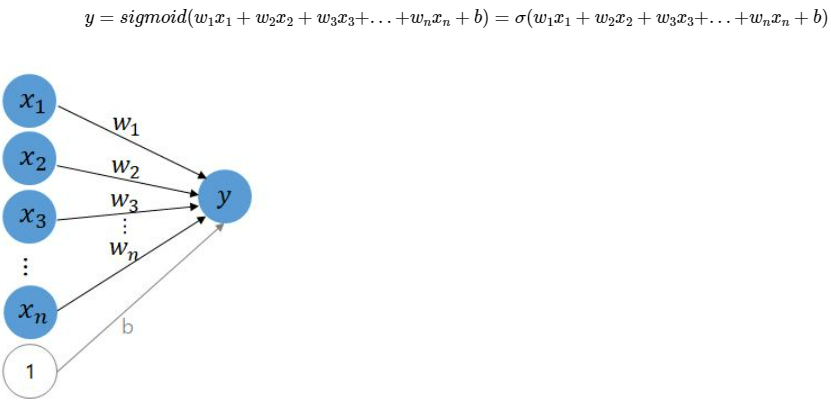

## 벡터와 행렬 연산

## 소프트맥스 회귀 (Softmax Regression)
- 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류 문제를 위한 소프트맥스 회귀(Softmax Regression)